# Анализ рынка вакансий аналитиков

У компании ЮгТрансХолдинг появилась необходимость в специалистах по аналитике данных и системному анализу, которых на данный момент в компании нет. Менеджерам HR-отдела необходимо выяснить зарплатные вилки, требования к навыкам и прочие характеристики для специалистов в зависимости от грейдов для формировани корректных предложений на рынке труда.

<b>Цель исследования:</b> определить ключевые признаки (зарплатная вилка, требуемые навыки, тип занятости и др.) для каждого грейда системных аналитиков и аналитиков данных.

Данные получены из API hh.ru и представлены двумя датасетами:

`vacancies_sa.xlsx` - данные о вакансиях системных аналитиков,

`vacancies_da.xlsx` - данные о вакансиях аналитиков данных

Данные в датасетах представлены следующими полями:
* `id` - Уникальный идентификатор вакансии;
* `name` - Название вакансии;
* `published_at` - Дата публикации;
* `alternate_url` - Ссылка на вакансию;
* `type` - Статус вакансии на момент получения данных от api и передачи
их в базу;
* `employer` - Работодатель;
* `department` - Работодатель, отдел;
* `area` - Регион места работы;
* `experience` - Требуемый опыт работы;
* `key_skills` - Ключевые навыки, в том числе найденные при анализе
полного текста вакансии. Поле генерируется после получения
информации от api;
* `schedule` - График работы;
* `employment` - Тип занятости;
* `description` - Описание вакансии;
* `description_lemmatized` - Лемматизированное описание вакансии;
* `salary_from` - Нижняя граница предлагаемой заработной платы;
* `salary_to` - Верхняя граница предлагаемой заработной платы;
* `salary_bin` - Категория зарплаты;
* `key_skills_from_key_skills_field` - Ключевые навыки из поля вакансии
key_skills;
* `hard_skills_from_description` - “Твердые” навыки, найденные при
обработке полей с навыками. Поле генерируется после получения
информации от api;
* `soft_skills_from_description` - “Мягкие” навыки,
найденные при обработке полей с навыками. Поле генерируется после
получения информации от api.

Данные актуальны на 29 декабря 2024 года.

<b>План исследования</b>:
1. Импорт необходимых библиотек, загрузка датасета и изучение основной информации
2. Предобработка данных
3. Исследовательский анализ данных
4. Определение доли грейдов
5. Определение типичного места работы
6. Определение доли навыков
7. Определение самых важных навыков
8. Выводы и рекомендации

## Импорт библиотек, загрузка датасета и изучение основной информации

Импортируем библиотеки, необходимые для дальнейшей работы

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7,4] # масштаб графиков по умолчанию
import seaborn as sns
sns.set_style('dark')
import warnings
warnings.filterwarnings('ignore') # убираем вывод предупреждений
from scipy import stats as st

Импортируем датасет с данными о вакансиях для системных аналитиков.

In [12]:
url_id = '1aAfxH7Kz8L2CkftvDdfmQ8nwZwProTYq'
url = 'https://drive.google.com/uc?id=' + url_id
df_sa = pd.read_excel(url)

Посмотрим основную информацию о данном датасете.

In [14]:
df_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

In [15]:
df_sa.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация


Импортируем датасет с данными о вакансиях для аналитиков данных и посмотрим информацию о нем.

In [17]:
url_id = '1XSLNNKxrI6M20CA4HJmiVoeK3jIH8XHU'
url = 'https://drive.google.com/uc?id=' + url_id
df_da = pd.read_excel(url)

In [18]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [19]:
df_da.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN


В обоих таблицах есть пропуски в столбцах с отделом работодателя, минимальной/максимальной зарплатой, ключевыми навыками из столбца 'key_skills', "мягкими" и "твердыми" навыками.

Названия вакансий в датафрейме указаны по разному. Для удобства приведем все вакансии к 2-м категориям: "аналитик данных" и "системный аналитик".

In [22]:
df_sa ['name_binary'] = 'системный аналитик'
df_da ['name_binary'] = 'аналитик данных'

Поскольку столбцы и тип данных в обоих датафреймах идентичны, их можно можно объединить в один.

In [24]:
frames = [df_sa, df_da]

In [25]:
df = pd.concat(frames).reset_index()

In [26]:
print(f'Проверим объединение таблиц. В таблице df_sa было {len(df_sa)} строк, а в таблице df_da - {len(df_da)} строк.')
print(f'Соответственно в объединенной таблице должно быть {len(df_sa)+len(df_da)} строк')

Проверим объединение таблиц. В таблице df_sa было 1915 строк, а в таблице df_da - 1801 строк.
Соответственно в объединенной таблице должно быть 3716 строк


In [27]:
print(f'В объединенной таблице {len(df)} строк')

В объединенной таблице 3716 строк


Объединение таблиц прошло успешно.

## Предобработка данных

Сменим тип данных в столбце с зарплатами на целое число.

In [31]:
df['salary_from'] = df['salary_from'].astype('Int64')
df['salary_to'] = df['salary_to'].astype('Int64')

Проверим таблицу на явные дубликаты.

In [33]:
df.duplicated().sum()

0

Явных дубликатов нет.
Проверим наличие неявных дубликатов в столбцах с категориальными данными.

In [35]:
print(f'В столбце с названиями вакансий {len(df['name'].unique())} уникальных значений.')

В столбце с названиями вакансий 1574 уникальных значений.


Нет смысла проверять каждый на уникальность. Однако, можно привести все значения к нижнему регистру и удалить пробелы')

In [37]:
#приводим значения к нижнему регистру
df['name'] = df['name'].str.lower()
#удаляем пробелы
df['name'] = df['name'].str.strip()

Выведем количество уникальных значений в столбце после обработки

In [39]:
f'Количество уникальных значений в столбце с названиями вакансий равно {len(df['name'].unique())}'

'Количество уникальных значений в столбце с названиями вакансий равно 1479'

Проверим уникальные значения столбца со статусом вакансий.

In [41]:
df['type'].unique()

array(['Открытая'], dtype=object)

Учитывая отсутствие пропусков в этом поле и наличие всего одной категории, это поле можно удалить для обеспечения быстродействия и более удобного вывода датафрейма.

In [43]:
df = df.drop('type', axis = 1)

Проверим уникальные значения в столбце с названием работодателя.

In [45]:
f'В данном столбце {len(df['employer'].unique())} уникальных значений'

'В данном столбце 1358 уникальных значений'

Приведем все значения столбца к нижнему регистру и избавимся от пробелов.

In [47]:
df['employer'] = df['employer'].str.lower()
df['employer'] = df['employer'].str.strip()

In [48]:
print(f'Количество уникальных значений в столбце после преобразований равно {len(df['employer'].unique())}')

Количество уникальных значений в столбце после преобразований равно 1358


Приведение значений столбца к нижнему регистру и удаление пробелов не повлияло на количество уникальных значений.

Проверим уникальные значения столбца с отделами компаний, предлагающих работу.

In [51]:
print(f'В данном столбце {len(df['department'].unique())} уникальных значений')

В данном столбце 130 уникальных значений


Приведем значения к нижнему регистру и избавимся от пробелов.

In [53]:
df['department'] = df['department'].str.lower()
df['department'] = df['department'].str.strip()

In [54]:
print(f'Количество уникальных значений в столбце после преобразований равно {len(df['department'].unique())}')

Количество уникальных значений в столбце после преобразований равно 130


Приведение значений столбца к нижнему регистру и удаление пробелов не повлияло на количество уникальных значений.

In [56]:
df['area'].unique()

array(['Москва', 'Санкт-Петербург', 'Апатиты', 'Екатеринбург', 'Курск',
       'Новосибирск', 'Пермь', 'Ростов-на-Дону', 'Краснодар', 'Ижевск',
       'Геленджик', 'Казань', 'Воронеж', 'Калининград', 'Владивосток',
       'Челябинск', 'Нижний Новгород', 'Белгород', 'Рубцовск',
       'Кольчугино', 'Томск', 'Омск', 'Смоленск', 'Калуга', 'Тверь',
       'Тюмень', 'Кострома', 'Тольятти', 'Майкоп', 'Сочи', 'Оренбург',
       'Саратов', 'Кемерово', 'Пенза', 'Уфа', 'Самара', 'Липецк',
       'Ставрополь', 'Хасавюрт', 'Иваново (Ивановская область)',
       'Вологда', 'Йошкар-Ола', 'Рязань', 'Владимир', 'Тамбов', 'Орел',
       'Тула', 'Красноярск', 'Киров (Кировская область)', 'Ульяновск',
       'Красногорск', 'Сургут', 'Белорецк', 'Ярославль', 'Брянск',
       'Чебоксары', 'Волгоград', 'Адлер', 'Саранск', 'Набережные Челны',
       'Севастополь', 'Мытищи', 'Дзержинск (Нижегородская область)',
       'Иннополис', 'Хабаровск', 'Таганрог', 'Иркутск', 'Улан-Удэ',
       'Петрозаводск', 'Магнито

Дубликатов нет, однако есть значения представленные административными центрами регионов с уточнением области в скобках. Такие значения могут занимать много места на графиках в дальнейшем, поэтому переименуем их.

In [58]:
df['area'] = df['area'].replace(['Иваново (Ивановская область)','Киров (Кировская область)'],['Иваново','Киров'])

In [59]:
df['area'].unique()

array(['Москва', 'Санкт-Петербург', 'Апатиты', 'Екатеринбург', 'Курск',
       'Новосибирск', 'Пермь', 'Ростов-на-Дону', 'Краснодар', 'Ижевск',
       'Геленджик', 'Казань', 'Воронеж', 'Калининград', 'Владивосток',
       'Челябинск', 'Нижний Новгород', 'Белгород', 'Рубцовск',
       'Кольчугино', 'Томск', 'Омск', 'Смоленск', 'Калуга', 'Тверь',
       'Тюмень', 'Кострома', 'Тольятти', 'Майкоп', 'Сочи', 'Оренбург',
       'Саратов', 'Кемерово', 'Пенза', 'Уфа', 'Самара', 'Липецк',
       'Ставрополь', 'Хасавюрт', 'Иваново', 'Вологда', 'Йошкар-Ола',
       'Рязань', 'Владимир', 'Тамбов', 'Орел', 'Тула', 'Красноярск',
       'Киров', 'Ульяновск', 'Красногорск', 'Сургут', 'Белорецк',
       'Ярославль', 'Брянск', 'Чебоксары', 'Волгоград', 'Адлер',
       'Саранск', 'Набережные Челны', 'Севастополь', 'Мытищи',
       'Дзержинск (Нижегородская область)', 'Иннополис', 'Хабаровск',
       'Таганрог', 'Иркутск', 'Улан-Удэ', 'Петрозаводск', 'Магнитогорск',
       'Барнаул', 'Королев', 'Астрахань'

Успешно.

Посмотрим наличие дубликатов в столбце с опытом работы.

In [62]:
df['experience'].unique()

array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experince)'], dtype=object)

Дубликатов нет, однако есть опечатка в слове "experience". Исправим ее.

In [64]:
df['experience'] = df['experience'].replace('Junior (no experince)','Junior (no experience)')
df['experience'].unique()

array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experience)'], dtype=object)

Успешно.

Приведем содержимое столбца с ключевыми навыками к нижнему регистру.

In [67]:
df['key_skills'] = df['key_skills'].str.lower()

Рассмотрим уникальные значения столбца с типом занятости.

In [69]:
df['employment'].unique()

array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

Дубликатов нет.

Проверим уникальные значения в столбце с графиком работы.

In [72]:
df['schedule'].unique()

array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

Неявных дубликатов нет.

Проверим наличие неявных дубликатов в столбце с категорией зарплаты.

In [75]:
df['salary_bin'].unique()

array(['ЗП не указана', 'От 100 тысяч до 200 тысяч', 'Меньше 100 тысяч',
       'Больше 300 тысяч', 'От 200 тысяч до 300 тысяч'], dtype=object)

Дубликаты не выявлены.

Проверим данные после операций.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             3716 non-null   int64         
 1   id                                3716 non-null   int64         
 2   name                              3716 non-null   object        
 3   published_at                      3716 non-null   datetime64[ns]
 4   alternate_url                     3716 non-null   object        
 5   employer                          3716 non-null   object        
 6   department                        882 non-null    object        
 7   area                              3716 non-null   object        
 8   experience                        3716 non-null   object        
 9   key_skills                        3716 non-null   object        
 10  schedule                          3716 non-null 

В ходе предобработки данных значения столбцов `name`, `employer`, `department`, `key_skills` были приведены к нижнему регистру. Столбец `type` был удален.

## Исследовательский анализ данных

### Анализ количественных данных

Проверим количественные данные на наличие аномалий.

Начнем с данных о минимальных зарплатах.

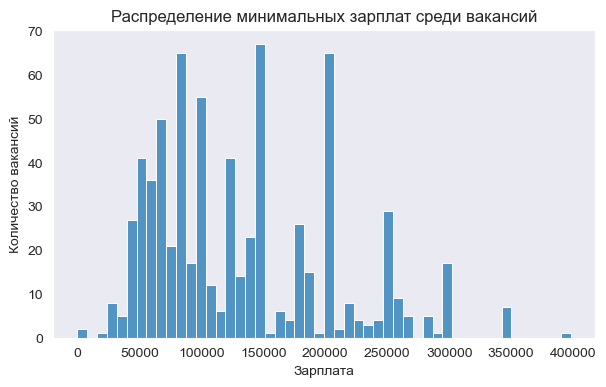

In [84]:
#строим гистограмму на основе данных из столбца о минимальных зарплатах
sns.histplot(df, x = 'salary_from', bins = 50)
#указываем название горизонтальной оси
plt.xlabel('Зарплата')
#указываем название вертикальной оси
plt.ylabel('Количество вакансий')
#указываем название графика
plt.title('Распределение минимальных зарплат среди вакансий')
plt.show()

В данных есть сверхнизкие значения и выбросы. Также можно увидеть много пиков в следствие наличия большого количества объявлений с круглыми значениями.

Рассмотрим сверхнизкие значения поближе.


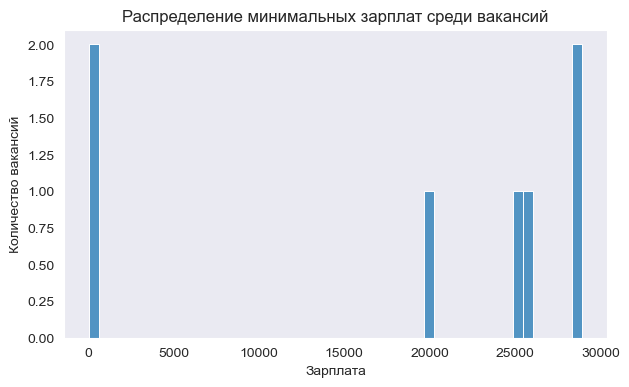

In [86]:
df_low_salary_from = df[df['salary_from']<30000]
sns.histplot(df_low_salary_from, x = 'salary_from', bins = 50)
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')
plt.title('Распределение минимальных зарплат среди вакансий')
plt.show()

Выведем на экран объявления с минимальной зарплатой менее 5000 рублей.

In [88]:
df.query('salary_from < 5000')

,index,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_binary
1470,1470,91944373,системный аналитик middle/senior,2024-07-06 15:14:38,https://hh.ru/vacancy/91944373,datanomica,NaN,Москва,Senior (6+ years),"['json api', 'json', 'xml', 'sql', 'юнит-эконо...",...,Полная занятость,"привет! мы — ооо «датаномика», решаем проблемы...",привет датаномика решать проблема структуриров...,280,340000,Больше 300 тысяч,"JSON API, XML, JSON, Agile, Java, SQL, Kafka","confluence, Юнит-экономика",NaN,системный аналитик
3025,1110,96943446,аналитик данных в отдел развития на маркетплейсах,2024-05-11 21:45:07,https://hh.ru/vacancy/96943446,репетуев иван дмитриевич,NaN,Москва,Junior (no experience),"['аналитическое мышление', 'аналитика продаж',...",...,Полная занятость,ищу в команду аналитика до глубины мозга косте...,искать команда аналитик глубина мозг кость име...,50,100001,От 100 тысяч до 200 тысяч,"Аналитика продаж, Конкурентная аналитика, Анал...",NaN,NaN,аналитик данных


В датафрейме 2 вакансии с аномальным значением в этом поле. В первом случае скорее всего имелось ввиду 280 тыс. рублей, учитывая что это вакансия грейда senior, значение максимальной зарплаты в 340 тыс. и категорию зарплаты. 

Во втором случае можно предположить ту же ошибку, но категория зарплаты для этого объявления - от 100 тыс. до 200 тыс., что противоречит предположению о минимальной зарплате в 50 тыс. рублей.

Исправим значение для первого случая на корректное, а во втором случае удаим строку из датафрейма.

In [90]:
# заменяем значение на 280000
df.loc[(df['id'] == 91944373) & (df['name_binary'] == 'системный аналитик'), 'salary_from'] = 280000

In [91]:
# удаляем значение
df = df.loc[~((df['id'] == 96943446) & (df['name_binary'] == 'аналитик данных'))]

Проверим данные после операций.

In [93]:
df.loc[(df['id'] == 91944373) & (df['name_binary'] == 'системный аналитик')][['id','salary_from']]

,id,salary_from
1470,91944373,280000


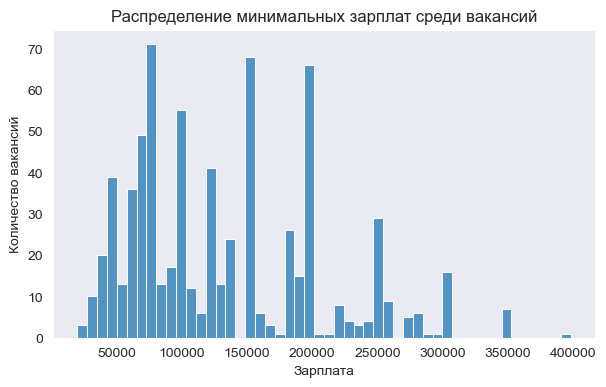

In [94]:
sns.histplot(df, x = 'salary_from', bins = 50)
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')
plt.title('Распределение минимальных зарплат среди вакансий')
plt.show()

Данные в столбце успешно обработаны.

Сравним распределение минимальных предлагаемых зарплат на диаграмме "ящик с усами".

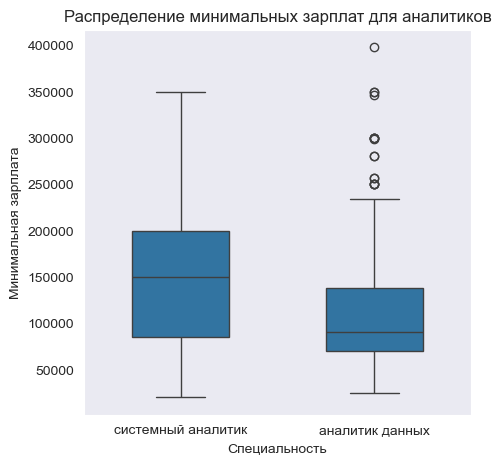

In [97]:
plt.figure(figsize = (5,5))
sns.boxplot(x='name_binary',y='salary_from', data=df, width = 0.5)
plt.xlabel('Специальность')
plt.ylabel('Минимальная зарплата')
plt.title ('Распределение минимальных зарплат для аналитиков')
plt.show()

Минимальные зарплаты, предлагаемые системным аналитикам в данном датасете выше, чем минимальные зарплаты аналитиков данных. Медианная минимальная предлагаемая зарплата системного аналитика составляет 150 тыс. рублей, для дата аналитиков эта цифра составляет около 100 тыс. рублей.

Проверим имеет ли эта разница статистическую значимость с помощью t-test'a.

In [100]:
# сохраняем выборки
sa_salary_from = df[(df['name_binary'] == 'системный аналитик') & (~df['salary_from'].isna())]['salary_from']
da_salary_from = df[(df['name_binary'] == 'аналитик данных') & (~df['salary_from'].isna()) & (df['salary_from'] < 250000)]['salary_from']

Проверим распределение выборок методом Шапиро-Уилка.

In [102]:
def normal_distribution(sample):
    results = st.shapiro(sample)
    alpha = 0.05
    print(results[1])
    if results[1] < alpha:
        print('P-значение ниже уровня статистической значимости: выборка распределена не нормально')
    else:
        print('P-значение выше уровня статистической значимости: выборка распределена нормально')

In [103]:
# выборка с зарплатами системных аналитиков
normal_distribution(sa_salary_from)

1.8329958867588586e-07
P-значение ниже уровня статистической значимости: выборка распределена не нормально


In [104]:
# выборка с зарплатами системных аналитиков
normal_distribution(da_salary_from)

8.127967552316547e-12
P-значение ниже уровня статистической значимости: выборка распределена не нормально


Обе выборки распределены не нормально. Однако это не помешает провести тест, благодаря ЦПТ при достаточном количестве наблюдений в выборках.

Проверим количество наблюдений и дисперсию в выборках.

In [107]:
print(f'Количество наблюдений в выборке для SA: {len(sa_salary_from)}, ее дисперсия равна {round(sa_salary_from.var())}')
print(f'Количество наблюдений в выборке для DA: {len(da_salary_from)}, ее дисперсия равна {round(da_salary_from.var())}')

Количество наблюдений в выборке для SA: 356, ее дисперсия равна 5503064689
Количество наблюдений в выборке для DA: 330, ее дисперсия равна 2190822878


Дисперсии в выборках отличаются, поэтому необходимо использовать параметр "equal_var = False"

Сформулируем гипотезы.

Нулевая гипотеза: средняя минимальная зарплата системных аналитиков не выше таковой у аналитиков данных.

Альтернативная гипотеза: средняя минимальная зарплата системных аналитиков выше таковой у аналитиков данных.

In [110]:
results = st.ttest_ind(sa_salary_from, da_salary_from, equal_var = False, alternative = 'greater')
alpha = 0.05
print('P-value =', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

P-value = 1.3179766368082253e-28
Нулевая гипотеза отвергается


Можно с определенной долей уверенности утверждать, что минимальные зарплаты системных аналитиков выше таковых у дата аналитиков.

Проанализируем зарплаты для каждого грейда отдельно.

Чтобы в дальнейшем не писать несколько раз подобный код для каждого графика, напишем функцию, принимающую на вход переменную с данными и признак.

In [114]:
def grade_plot(data, feature):
    plt.figure(figsize = (8,5))
    ranks = df.groupby(['experience'])[feature].median().fillna(0)\
    .sort_values(ascending = False)[::-1].index # сортировка графиков по возрастанию медианы
    sns.boxplot(data, x='experience', y = feature, hue = 'name_binary', showfliers = False, order = ranks)
    plt.xlabel('Грейд')
    plt.ylabel('Зарплата')
    plt.legend(title = 'Специальность')

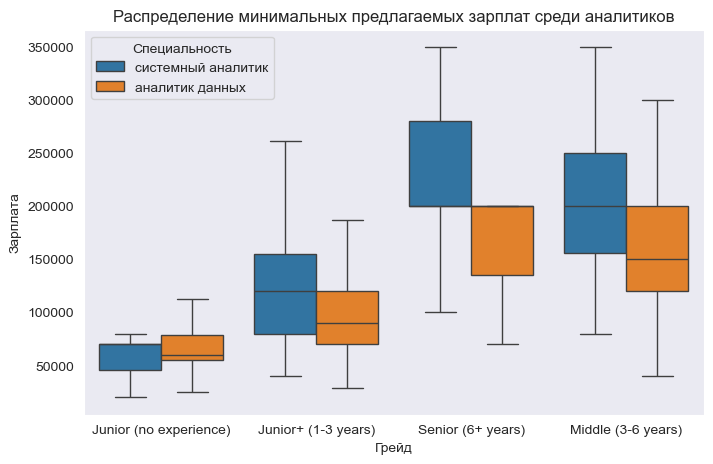

In [115]:
grade_plot (df, 'salary_from')
plt.title('Распределение минимальных предлагаемых зарплат среди аналитиков')
plt.show()

Самые низкие минимальные ЗП предлагают специалистам без опыта: в основном чуть выше 50 тыс. рублей.

Специалистам уровня Junior+ предлагают более высокие минимальные зарплаты. При этом ЗП системных аналитиков данного грейда выше: их медианная минимальная ЗП находится в районе 100-150 тыс. рублей, медианная минимальная ЗП Junior+ аналитиков данных: чуть менее 100 тыс. рублей.

Медианная минимальная зарплата Middle дата аналитиков находится на уровне 150 тыс. рублей, для Middle системных аналитиков это значение находится на уровне 200 тыс. рублей.

Больших отличий в уровне минимальной зарплаты для специалистов уровня Senior по сравнению со специалистами уровня Middle не обнаружено. Возможно из-за недостаточного количества данных.

Максимальные предлагаемые зарплаты для системных аналитиков также выше. Для них медиана находится чуть выше 200 тыс. рублей, для дата аналитиков она находится чуть выше 100 тыс. рублей.

Исследуем данные о максимальных зарплатах.

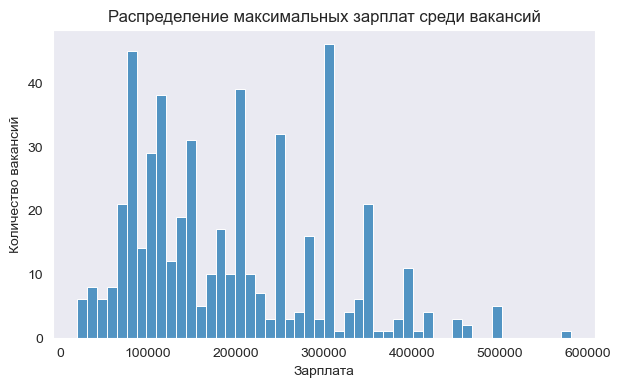

In [119]:
sns.histplot(df, x = 'salary_to', bins = 50)
plt.title('Распределение максимальных зарплат среди вакансий')
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')
plt.show()

Гистограмма похожа на предыдущую: много пиков на круглых числах, есть выбросы, распределение не нормальное.

Проанализируем максимальную зарплату среди аналитиков.

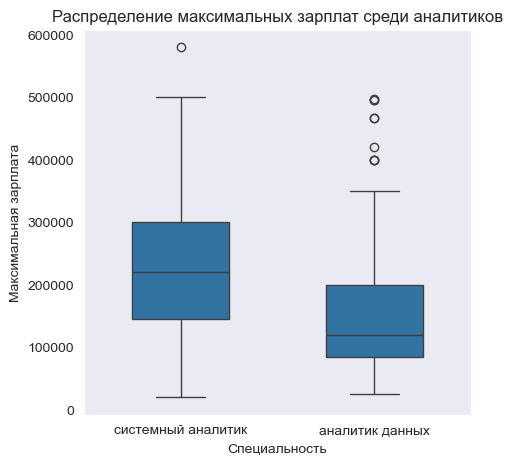

In [122]:
plt.figure(figsize = (5,5))
sns.boxplot(x='name_binary',y='salary_to', data=df, width = 0.5)
plt.title ('Распределение максимальных зарплат среди аналитиков')
plt.xlabel('Специальность')
plt.ylabel('Максимальная зарплата')
plt.show()

В данном датасете максимальные предлагаемые зарплаты системных аналитиков выше таковых у аналитиков данных.

Проверим существует ли статистически значимая разница между двумя профессиями по данному признаку.

In [125]:
# сохраняем выборки
sa_salary_to = df.loc[(df['name_binary'] == 'системный аналитик') & (~df['salary_to'].isna()) & (df['salary_to']<550000)]['salary_to']
da_salary_to = df.loc[(df['name_binary'] == 'аналитик данных') & (~df['salary_to'].isna()) & (df['salary_to']<370000)]['salary_to']

In [126]:
print(f'Количество наблюдений в выборке для SA: {len(sa_salary_to)}, ее дисперсия равна {round(sa_salary_to.var())}')
print(f'Количество наблюдений в выборке для DA: {len(da_salary_to)}, ее дисперсия равна {round(da_salary_to.var())}')

Количество наблюдений в выборке для SA: 278, ее дисперсия равна 10322950087
Количество наблюдений в выборке для DA: 218, ее дисперсия равна 6044620823


Дисперсия двух выборок заметно отличается. Необходимо использовать параметр "equal_var = False"

Сформулируем гипотезы.

Нулевая гипотеза: средняя максимальная предлагаемая зарплата для системных аналитиков не выше таковой для аналитиков данных.

АЛьтернативная гипотеза: средняя максимальная предлагаемая зарплата выше для системных аналитиков, чем для аналитиков данных.

In [129]:
results = st.ttest_ind(sa_salary_to, da_salary_to, equal_var = False, alternative = 'greater')
print('P-value =', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

P-value = 7.904156545793355e-22
Нулевая гипотеза отвергается


Можно утверждать о более высокой средней максимальной предлагаемой зарплате для системных аналитиков.

Сравним зарплаты по грейдам.

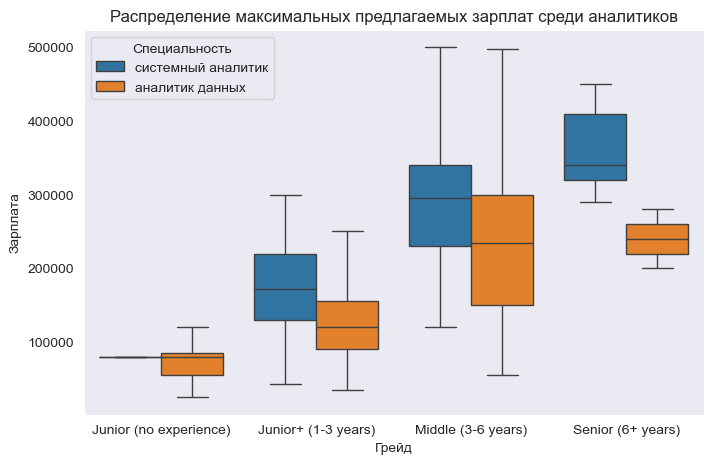

In [132]:
grade_plot(df,'salary_to')
plt.title('Распределение максимальных предлагаемых зарплат среди аналитиков')
plt.show()

Объявлений с указанной информацией о максимальной ЗП для системных аналитиков без опыта практически нет. Медиана макcимальной предлагаемой зарплаты для дата аналитиков находится на отметке чуть ниже 100 тыс. рублей.

Системным аналитикам уровня Junior+ предлагают потолок зарплаты с медианой на уровне 150-200 тыс. рублей. Максимальная медианная зарплата аналитиков данных находится на уровне 100-150 тыс. рублей.

Системным аналитикам уровня Middle предлагают максимальную зарплату с медианой в 300 тыс. рублей. У дата аналитиков уровня Middle довольно большой межквартильный размах (от 150 до 300 тыс. рублей) с медианой на уровне 200-250 тыс. рублей.

Предлагаемый потолок зарплаты для системных аналитиков уровня Senior находится, в основном, на уровне 300-400 тыс. рублей (медиана примерно на 325 тыс.). Медианные максимальные зарплаты Senior дата аналитиков практически не отличаются  зарплат уровня Middle. При этом  "сеньорам" практически не предлагают зарплаты более 300 тыс. рублей, в отличии от "миддлов".

Таким образом, можно сделать вывод, что предлагаемые на hh.ru зарплаты системных аналитиков выше, чем у дата аналитиков.

### Анализ категориальных данных

Рассмотрим специалистов какого грейда чаще ищут работодатели. Сравним долю грейдов у системных аналитиков и дата аналитиков.

In [137]:
grades = df.groupby(['experience','name_binary'])['id'].count().reset_index()

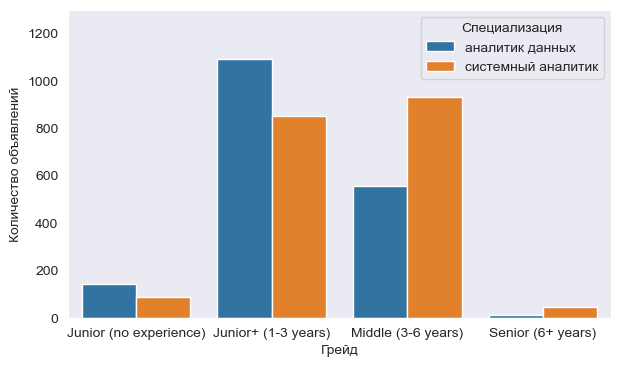

In [138]:
sns.barplot(grades, x = 'experience', hue = 'name_binary', y = 'id')
plt.xlabel('Грейд')
plt.ylabel('Количество объявлений')
plt.tick_params(axis = 'x', rotation = 0) # отображение подписей к столбцам по горизонтали
plt.legend(title = 'Специализация') # название легенды
plt.ylim(0,1300) # предел оси Y, чтобы легенда не перекрывала столбец
plt.show()

В подавляющем большинстве случаев работодатели ищут системных аналитиков и дата аналитиков уровня Junior+ и Middle, однако среди дата аналитиков работодатели чаще ищут специалистов уровня Junior+, чем Middle.
Вакансий для аналитиков грейда Senior довольно мало, что стоит учитывать в дальнейшем анализе.

Определим топ работодателей для каждой профессии. Начнем с системных аналитиков.

In [141]:
#переименуем некоторые названия работодателей, чтобы не занимали много места на графике
df['employer'] = df['employer'].replace(['магнит, розничная сеть','центральный банк российской федерации',\
'совкомбанк технологии','псб (пао «промсвязьбанк»)','ростелеком информационные технологии',\
'красное & белое, розничная сеть'],['магнит','ЦБ РФ','совкомбанк','ПСБ','ростелеком', 'красное & белое'],regex = False)

In [142]:
#создаем сводную таблицу, в которой указано количество объявлений для каждого работодателя
top_empls = df.pivot_table(index = 'employer', columns = 'name_binary', values = 'id', aggfunc = 'count').reset_index()

Визуализируем данные на столбчатой диаграмме.

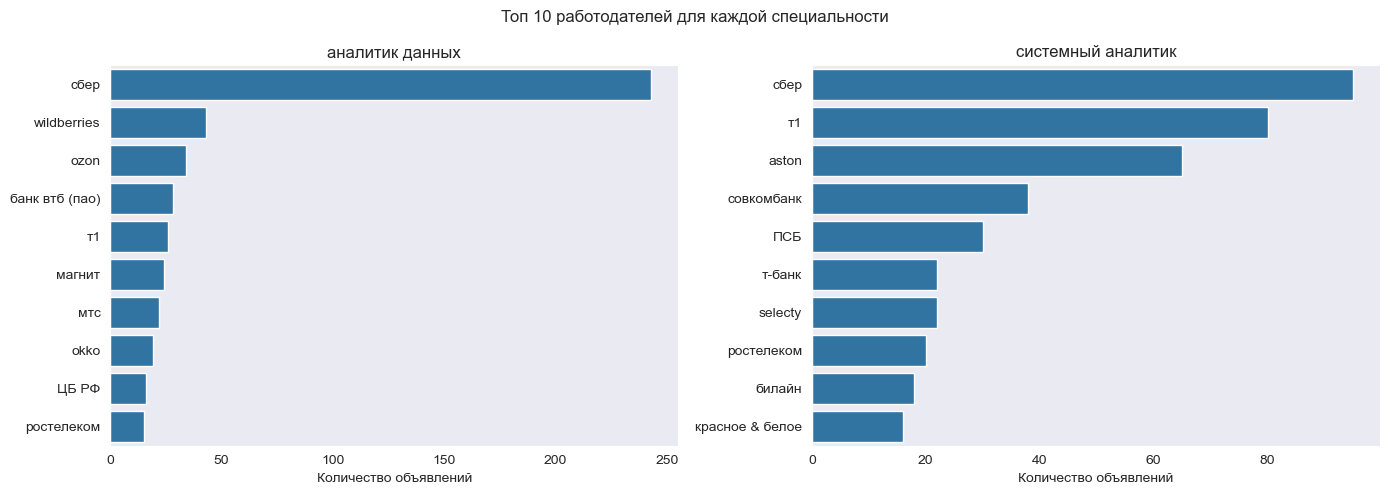

In [144]:
fig, axs = plt.subplots(1,2, figsize = (14,5))
for i,column in enumerate(top_empls.drop('employer', axis = 1).columns):
    top_empls_ = top_empls.sort_values (by = column, ascending = False).head(10)
    sns.barplot(top_empls_, y = 'employer', x = column, ax = axs[i])
    axs[i].set_xlabel('Количество объявлений')
    axs[i].set_ylabel('')
    axs[i].set_title(f'{column}')
fig.suptitle('Топ 10 работодателей для каждой специальности')
plt.tight_layout()
plt.show()

Компания Сбер оставила больше других объявлений о поиске аналитика данных. Другие работодатели, входящие в топ 10 компаний, ищущих аналитиков даннных представлены на диаграмме.

У системных аналитиков лидируют компании Сбер и Т1. Другие работодатели, входящие в топ 10, представлены на диаграмме.

Рассмотрим топ работодателей для каждой специальности и каждого грейда отдельно.

In [147]:
# Создаем отфильтрованный датафрейм с объявлениями только для аналитиков данных
da_filtered = df.query('name_binary == "аналитик данных"')

In [148]:
# Проверим работу функции
da_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 1915 to 3715
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   index                             1800 non-null   int64         
 1   id                                1800 non-null   int64         
 2   name                              1800 non-null   object        
 3   published_at                      1800 non-null   datetime64[ns]
 4   alternate_url                     1800 non-null   object        
 5   employer                          1800 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1800 non-null   object        
 8   experience                        1800 non-null   object        
 9   key_skills                        1800 non-null   object        
 10  schedule                          1800 non-null   

In [149]:
da_filtered.head(3)

,index,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,name_binary
1915,0,100039284,junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,dns головной офис,NaN,Владивосток,Junior (no experience),"['power bi', 'субд', 'python', 'sql']",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000,<NA>,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,аналитик данных
1916,1,100039480,аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,комус,NaN,Москва,Junior (no experience),"['ms sql', 'работа с базами данных', 'ms excel']",...,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,<NA>,<NA>,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,аналитик данных
1917,2,100042705,аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,dns головной офис,NaN,Владивосток,Junior+ (1-3 years),"['sql', 'power bi', 'субд', 'python', 'clickho...",...,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000,<NA>,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,аналитик данных


In [150]:
#заменяем слишком длинные названия работодателей на более компактные
da_filtered.loc[:,'employer'] = da_filtered.loc[:,'employer'].replace(['согласие, страховая компания',\
'гку центр занятости населения города москвы','гкуз ло медицинский информационно-аналитический центр', \
'ростелеком - центры обработки данных'],['согласие','центр занятости, Москва','мед. аналитический центр'\
, 'ростелеком'],regex = True)

Отобразим топ 10 компаний для каждого грейда аналитика данных с помощью столбчатых диаграмм.

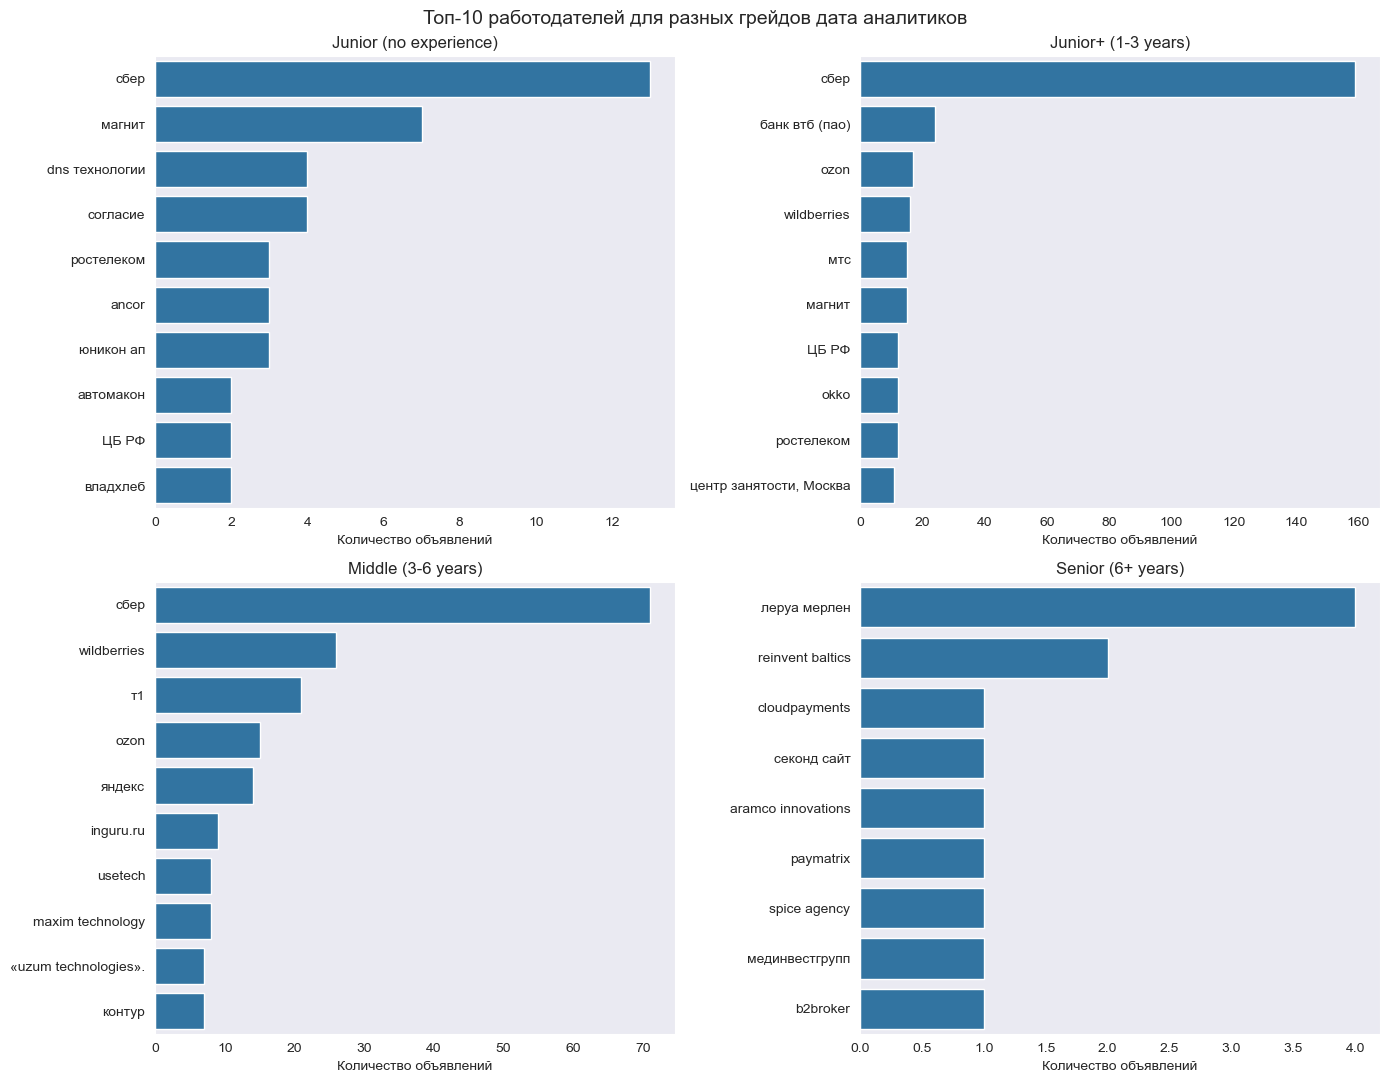

In [152]:
fig, axs = plt.subplots (2,2, figsize = (14,11)) # задаем количество графиков в окне
axs = axs.flatten() # задаем координаты графиков в удобном формате
for i, e in enumerate(da_filtered['experience'].unique()): # строим графики для каждого грейда
    grade = da_filtered[da_filtered['experience'] == e]['employer'].value_counts().head(10)
    sns.barplot(grade, orient = 'y', ax = axs[i])
    axs[i].set_title(f'{e}')
for ax in axs:
    ax.set(ylabel = '', xlabel = 'Количество объявлений')
fig.suptitle('Топ-10 работодателей для разных грейдов дата аналитиков', fontsize = 14) # общее название
plt.tight_layout()
plt.show()

Компания Сбер лидирует по количеству объявлений для всех грейдов дата аналитиков, кроме senior. Там лидирует Леруа Мерлен. Однако стоит отметить, что количество объявлений для этого грейда довольно маленькое. Другие работодатели, подавшие наибольшое количество объявлений для каждого грейда, представлены на графиках.

Рассмотрим топ работодателей для каждого грейда у системных аналитиков.

In [155]:
#создаем отфильтрованную таблицу, куда войдут только объявления для системных аналитиков
sa_filtered = df.query('name_binary == "системный аналитик"')

In [156]:
#заменяем слишком длинные названия работодателей на более компактные
sa_filtered.loc[:,'employer'] = sa_filtered.loc[:,'employer'].replace(['twiga communication group', 'совкомбанк технологии',\
'красное & белое, розничная сеть','ростелеком информационные технологии','головное подразделение сибагро',\
'бфт-холдинг (бюджетные и финансовые технологии)','центр финансовых технологий'],['twiga','совкомбанк','красное & белое','ростелеком','сибагро',\
'бфт-холдинг','центр фин. технологий'],regex = True)

In [157]:
sa_filtered.loc[:,'employer'] = sa_filtered.loc[:,'employer'].replace(['компания апогей (1с-франчайзи)',\
'бфт-холдинг (бюджетные и финансовые технологии)','псб (пао «промсвязьбанк»)'],['апогей','бфт-холдинг','ПСБ'])

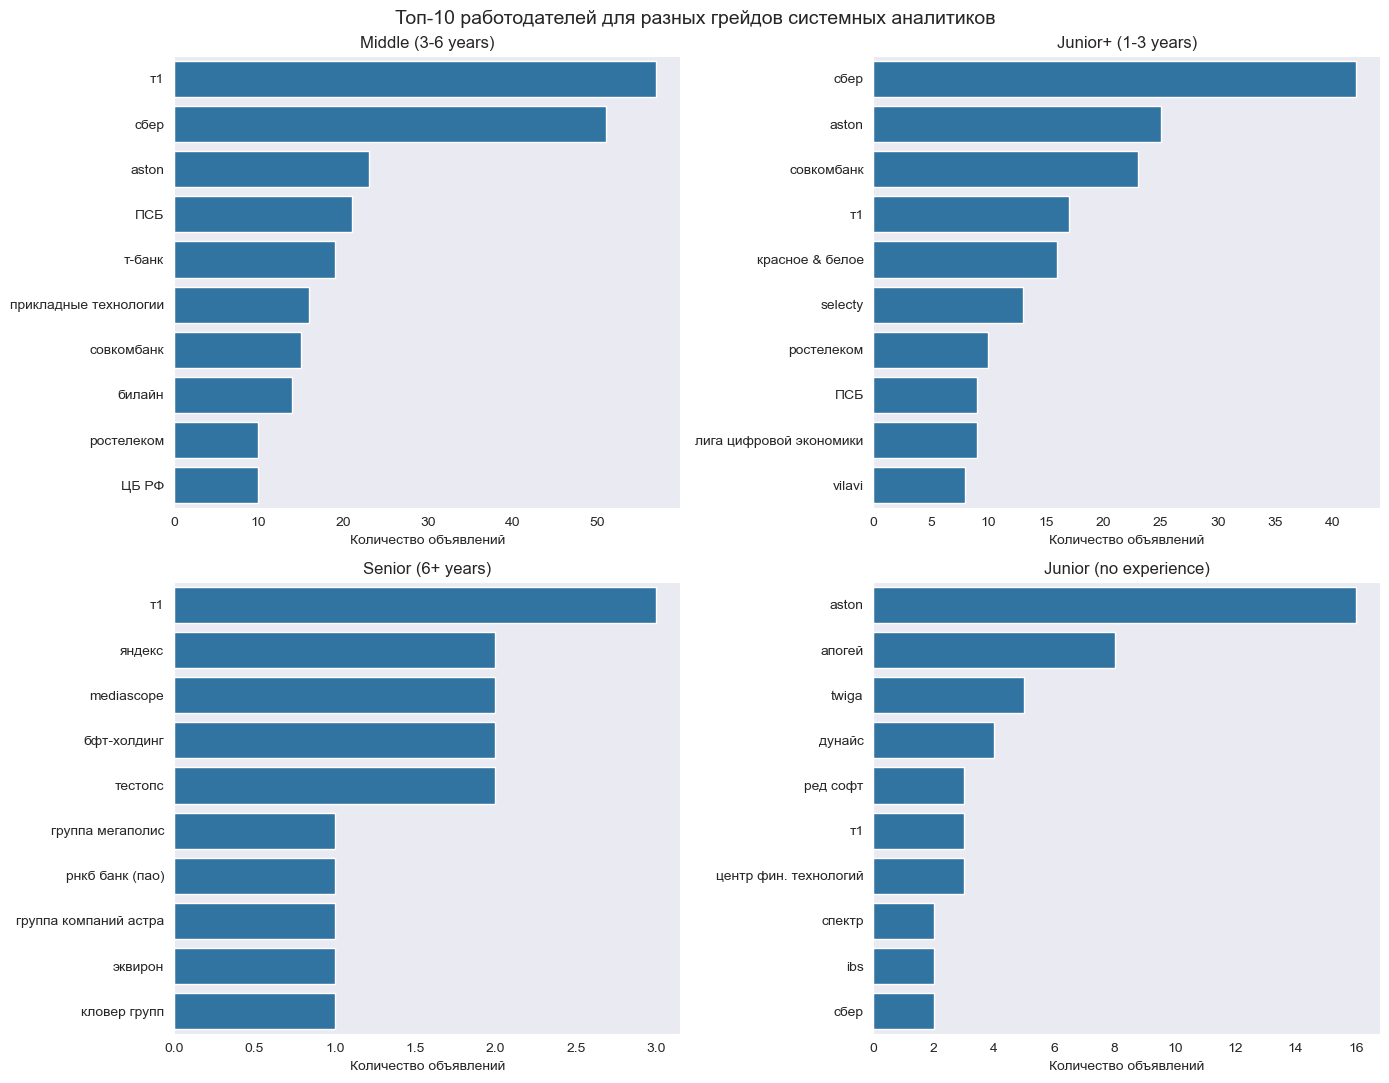

In [158]:
fig, axs = plt.subplots (2,2, figsize = (14,11)) 
axs = axs.flatten()
for i, e in enumerate(sa_filtered['experience'].unique()): 
    grade = sa_filtered[sa_filtered['experience'] == e]['employer'].value_counts().head(10)
    sns.barplot(grade, orient = 'y', ax = axs[i])
    axs[i].set_title(f'{e}')
for ax in axs:
    ax.set(ylabel = '', xlabel = 'Количество объявлений')
fig.suptitle('Топ-10 работодателей для разных грейдов системных аналитиков', fontsize = 14) # общее название
plt.tight_layout()
plt.show()

Для системных аналитиков без опыта лидируют компании Aston, Апогей, Twiga и другие (представлены на графике).
Для грейда Junior+: компании Сбер, Aston, Совкомбанк. Объявлений о поиске системных аналитиков уровня Middle больше всего подали Т1, Сбер, ПСБ. Сеньоров чаще всего ищет компания Т1, однако объявлений для поиска данного грейда слишком мало.

Проанализируем категории заработной платы.

Создадим сводную таблицу, в которой указано количество объявлений для каждой категории ЗП для каждой специальности. На ее основе построим график.

In [162]:
salary_bin_pivot = df.pivot_table (index = 'salary_bin', columns = 'name_binary', values = 'id', aggfunc = 'count')
salary_bin_pivot = salary_bin_pivot.sort_values (by = 'системный аналитик', ascending = False)

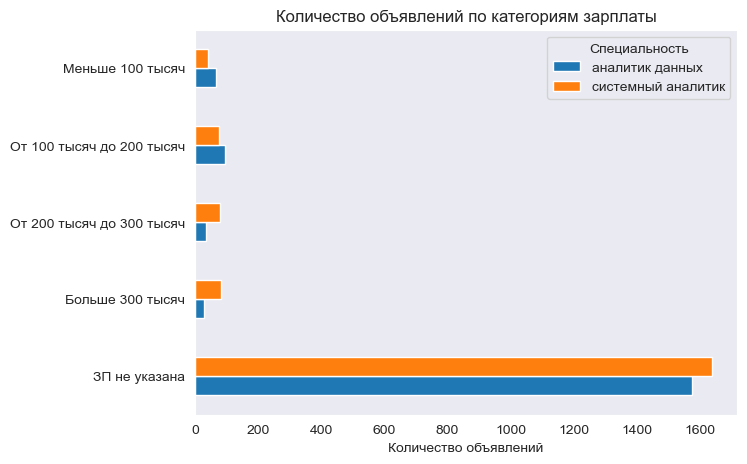

In [163]:
salary_bin_pivot.plot (kind = 'barh', figsize = (7,5))
plt.ylabel('')
plt.xlabel('Количество объявлений')
plt.legend(title = 'Специальность')
plt.title ('Количество объявлений по категориям зарплаты')
plt.show()

В подавляющем большинстве случаев работодатель не указывает категорию ЗП. Из тех объявлений, где категория указана, наблюдаем следующую картину: зарплаты более 200 тыс. чаще предлагают системным аналитикам, аналитикам данных чаще предлагают зарплаты менее 200 тыс.

Проанализируем зарплаты отдельно для каждого грейда.

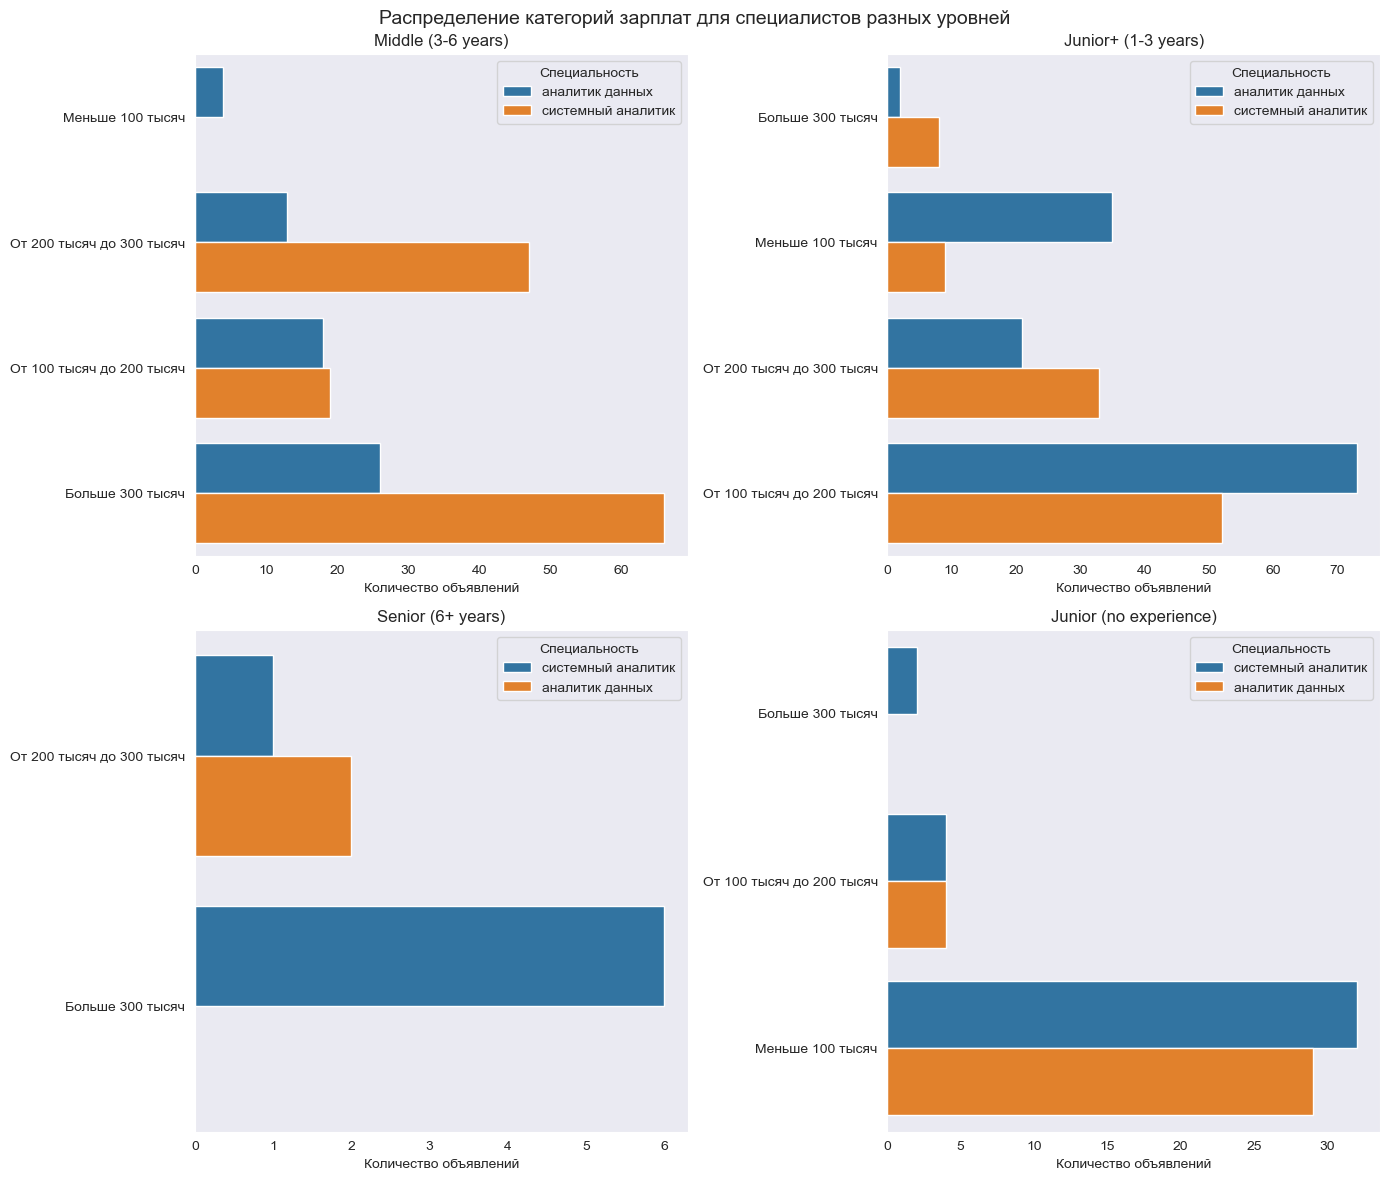

In [166]:
df_only_salary = df[df['salary_bin']!= 'ЗП не указана'] # исключаем из анализа категорию "ЗП не указана"
fig, axs = plt.subplots(2,2, figsize = (14,12))
axs = axs.flatten()
for i,e in enumerate(df['experience'].unique()):
    salary_by_grade = df_only_salary[df_only_salary['experience']==e].groupby(['salary_bin','name_binary'])['id'].count()\
.reset_index().sort_values(by='id')
    sns.barplot(salary_by_grade, x = 'id', hue = 'name_binary', y = 'salary_bin', ax = axs[i])
    for ax in axs:
        ax.set(xlabel = 'Количество объявлений', ylabel = '')
        axs[i].legend (title = 'Специальность')
    axs[i].set_title(e)
fig.suptitle ('Распределение категорий зарплат для специалистов разных уровней', fontsize = 14)
plt.tight_layout()
plt.show()

Для специалистов без опыта в основном предлагают зарплату менее 100 тыс. рублей.

Специалистам уровня Junior+ в большинстве случаев предлагают зарплату от 100 до 200 тыс. рублей для обеих профессий. Однако системным аналитикам данного грейда предлагают ЗП от 200 до 300 тыс. рублей чаще, чем ЗП менее 100 тыс. У Junior+ дата аналитиков наоборот объявлений с предлагаемой ЗП менее 100 тыс. больше, чем с ЗП от 200 до 300 тыс. рублей. Специалистам такого уровня редко предлагают зарплату выше 300 тыс. рублей, а если и предлагают, то чаще всего системным аналитикам.

"Миддлам" чаще всего работодатели предлагают зарплату выше 300 тысяч рублей. Однако, вторая по популярности категория ЗП для дата аналитиков данной категории - от 100 до 200 тыс. рублей, тогда как для системных аналитиков - от 200 до 300 тыс. рублей.

В датасете мало объявлений для специалистов уровня Senior с указанной категорией ЗП. Из тех данных что у нас есть, мы видим, что им не предлагают зарплаты менее 200 тыс. рублей, а ЗП более 300 тыс. рублей имеют только системные аналитики.

Проанализируем типы занятости.

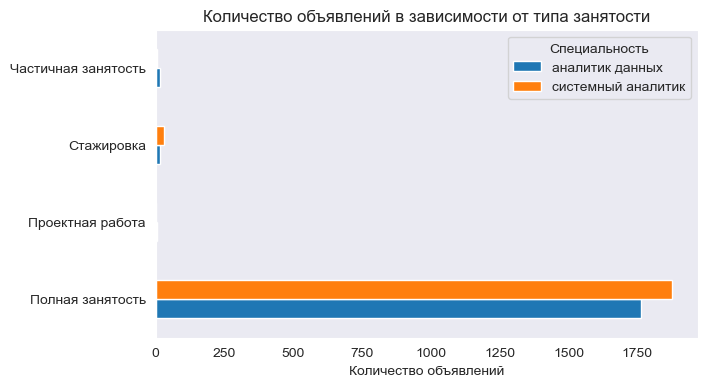

In [169]:
employment_pivot = df.pivot_table(index = 'employment', columns = 'name_binary', values = 'id', aggfunc = 'count')
employment_pivot.plot (kind = 'barh')
plt.title('Количество объявлений в зависимости от типа занятости')
plt.xlabel('Количество объявлений')
plt.ylabel('')
plt.legend (title = 'Специальность')
plt.show()

Подавляющее число работодателей ищет соискателей на полную занятость для обеих профессий.

Сравним количество объявлений по типу занятости для каждого грейда отдельно.

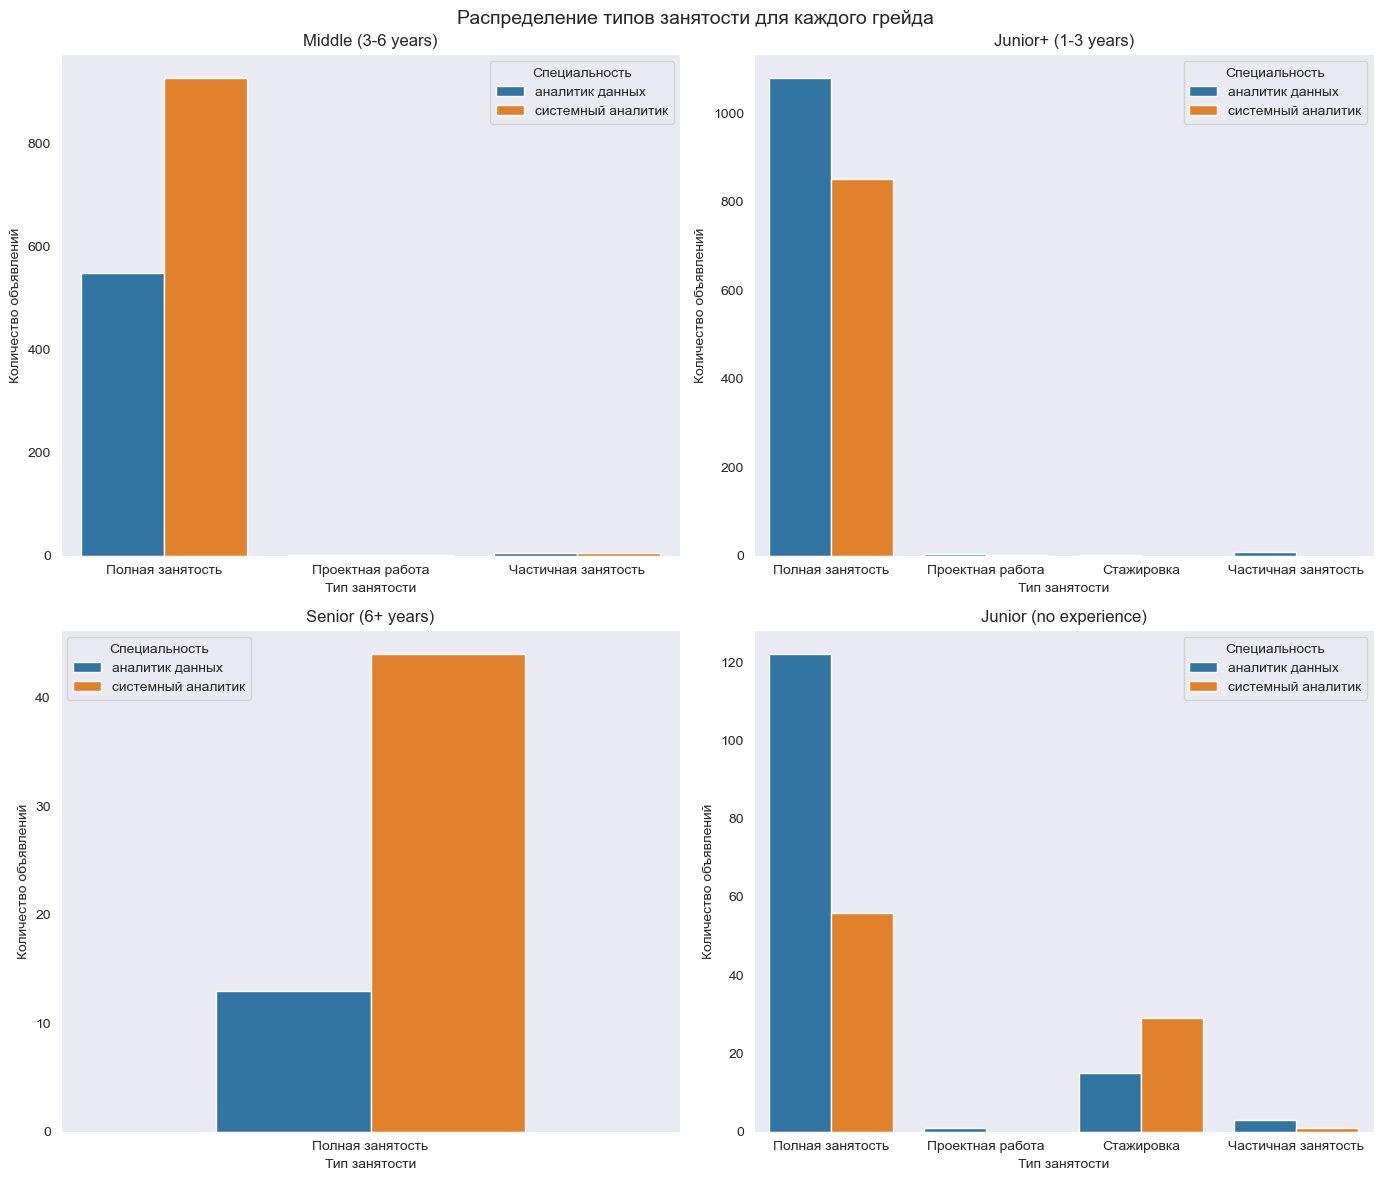

In [172]:
fig, axs = plt.subplots(2,2, figsize = (14,12))
axs = axs.flatten()
for i,e in enumerate(df['experience'].unique()):
    employment_by_grade = df[df['experience']==e].groupby(['employment','name_binary'])['id'].count().reset_index()
    if i == 2:
        sns.barplot (employment_by_grade, x = 'employment', y = 'id', hue = 'name_binary', ax = axs[i], width = 0.5)
    else:
        sns.barplot (employment_by_grade, x = 'employment', y = 'id', hue = 'name_binary', ax = axs[i])
    for ax in axs:
        ax.set(xlabel ='Тип занятости', ylabel = 'Количество объявлений')
    axs[i].legend (title = 'Специальность')
    axs[i].set_title(e)
fig.suptitle ('Распределение типов занятости для каждого грейда', fontsize = 14)
plt.tight_layout()
plt.show()

В целом, та же картина: работодатели в подавляющем большинстве случаев ищут соискателей на полную занятость. Однако здесь мы также можем увидеть, что специалистам без опыта часто предлагают стажировку, причем системным аналитикам вдвое чаще, чем дата аналитикам.

Проанализируем графики работы.

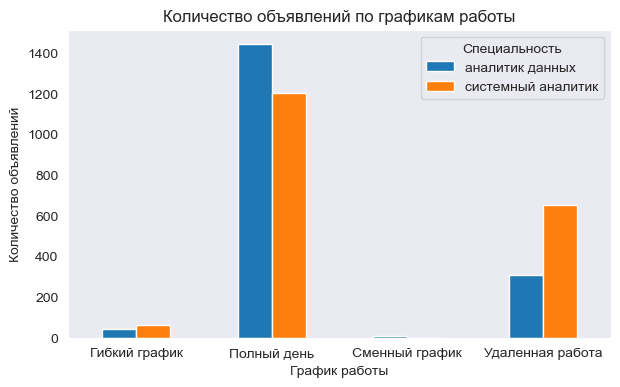

In [175]:
schedule_pivot = df.pivot_table(index = 'schedule', columns = 'name_binary', values = 'id',aggfunc = 'count')
schedule_pivot.plot(kind = 'bar')
plt.xlabel('График работы')
plt.ylabel('Количество объявлений')
plt.legend(title = 'Специальность')
plt.title('Количество объявлений по графикам работы')
plt.tick_params (axis = 'x', rotation = 0)
plt.show()

Работодатели в первую очередь ищут сотрудников, которые будут уделять работе весь рабочий день. При этом системным аналитикам проще найти удаленную работу, чем дата аналитикам.

Сравним графики по грейдам.

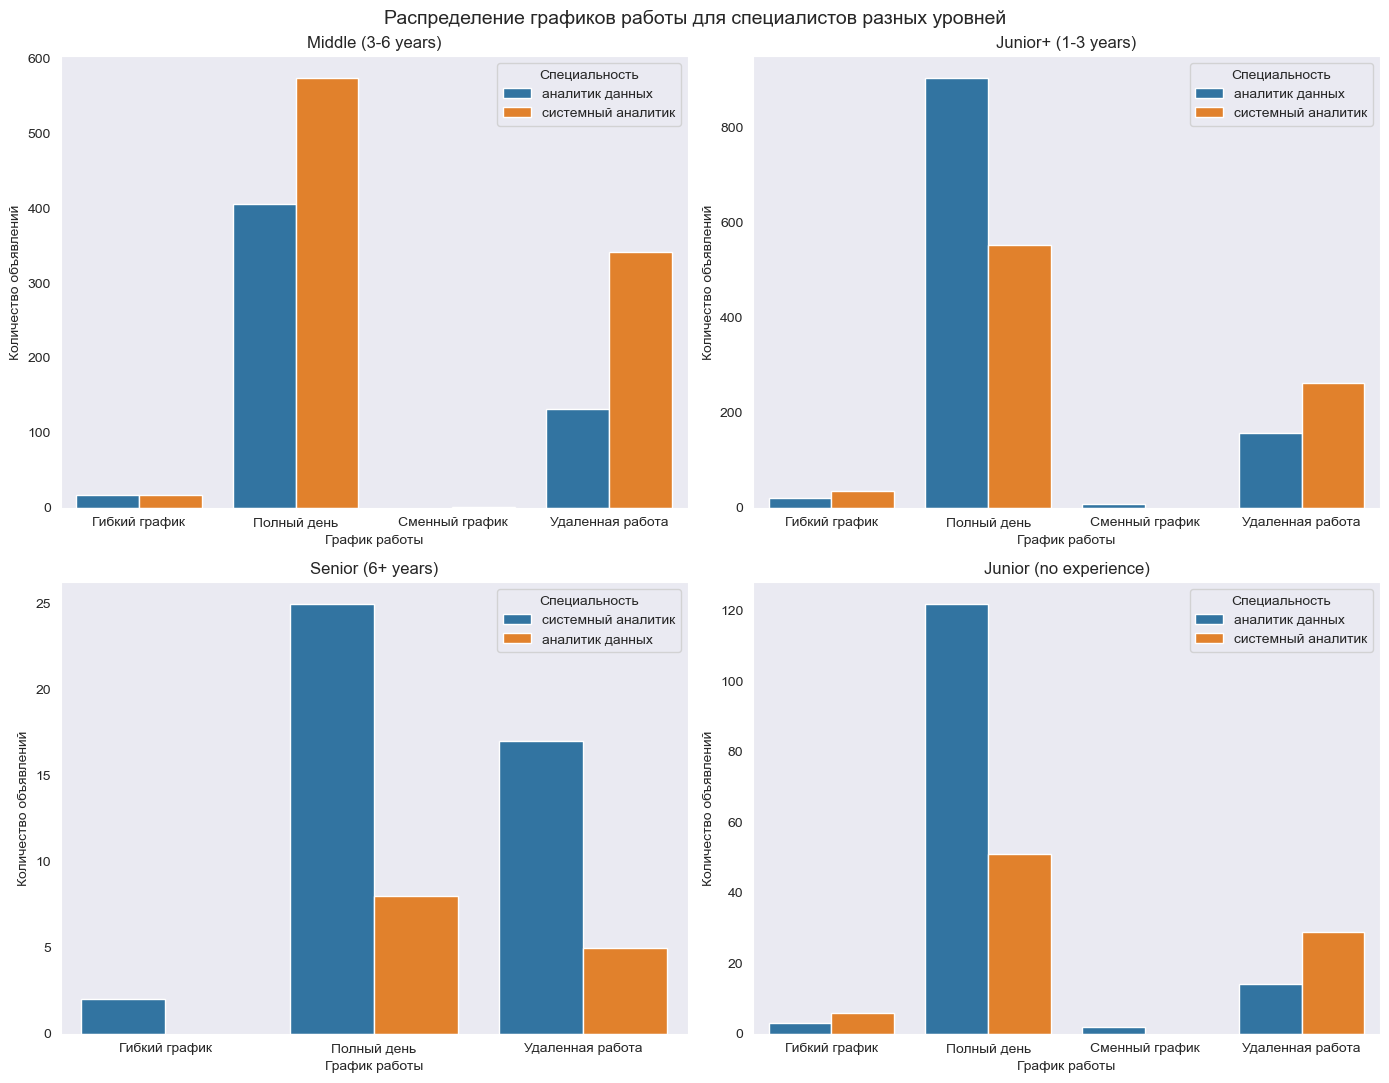

In [178]:
fig, axs = plt.subplots (2,2, figsize = (14,11))
axs = axs.flatten()
for i,e in enumerate(df['experience'].unique()):
    schedule_by_grade = df[df['experience']==e].groupby(['schedule','name_binary'])['id'].count().reset_index()
    sns.barplot(schedule_by_grade, x = 'schedule', y = 'id', hue = 'name_binary', ax = axs[i])
    for ax in axs:
        ax.set(xlabel = 'График работы', ylabel = 'Количество объявлений')
    axs[i].legend (title = 'Специальность')
    axs[i].set_title(e)
fig.suptitle('Распределение графиков работы для специалистов разных уровней', fontsize = 14)
plt.tight_layout()
plt.show()

Работодатели в большинстве случаев требуют от соискателей работать полный рабочий день на месте работы, однако на рынке труда немало предложений по удаленной работе.
Предложений с гибким и сменным графиком очень мало.

Таким образом типичным местом работы для аналитика данных будет работа на полную занятость и полный рабочий день в таких компаниях как Сбер, Т1 и другие. 

Типичным местом работы для системного аналитика будет работа на полную занятость и полный рабочий день в таких компаниях как Сбер, Т1, МТС и другие. 

## Определение доли навыков

Определим для каждой специальности какие из 2-х категорий навыков (hard skills и soft skills) спрашивают чаще.

Чтобы это определить, нужно провести категоризацию данных, а именно указать какие из навыков относятся к "мягким", а какие к "жестким".
Получим список навыков из столбца "key_skills" с помощью функции .explode().

In [184]:
#очистим значения столбца от лишних символов
df.loc[:,'key_skills'] = df.loc[:,'key_skills'].str.replace('[','').str.replace(']','').str.replace("'",'').str.strip()

In [185]:
#превращаем каждое значение ячейки в список, каждый элемент которого разделен запятой
df.loc[:,'key_skills'] = df.loc[:,'key_skills'].str.split(',')

In [186]:
# содержимое стобца с навыками
df.loc[:,'key_skills']

0       [1с,  аналитический склад ума,  confluence,  sql]
1       [разработка технических заданий,  бизнес-анали...
2                                          [документация]
3       [erp,  atlassian jira,  1с: управление произво...
4       [json,  sql,  xml,  soap,  html,  js,  java,  ...
                              ...                        
3711    [проактивность,  коммуникация,  sql,  ad-hoc, ...
3712    [грамотная речь,  сводные таблицы,  сбор и ана...
3713    [анализ данных,  sql,  ms power bi,  python,  ...
3714    [анализ данных,  sql,  ms power bi,  python,  ...
3715    [анализ данных,  sql,  ms power bi,  python,  ...
Name: key_skills, Length: 3715, dtype: object

Значения столбца представлены в виде списка, каждый навык в котором составляет отдельный элемент списка.

Чтобы каждый навык был в отдельной ячейке применим функцию .explode()

In [189]:
#сохраняем в новую переменную куда войдет 4 столбца от изначального датафрейма для экономии ресурсов
df_exploded = df[['id','experience','key_skills','name_binary']].explode('key_skills')

Проверим работу функции и количество значений навыков.

In [191]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20564 entries, 0 to 3715
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           20564 non-null  int64 
 1   experience   20564 non-null  object
 2   key_skills   20564 non-null  object
 3   name_binary  20564 non-null  object
dtypes: int64(1), object(3)
memory usage: 803.3+ KB


In [192]:
df_exploded['key_skills'].unique()

array(['1с', ' аналитический склад ума', ' confluence', ...,
       ' портфельный анализ', ' внутренний аудит информационных систем',
       ' контрольно-аналитические проверки'], dtype=object)

Многие навыки указаны с лишними пробелами. Удалим пробелы.

In [194]:
df_exploded['key_skills'] = df_exploded['key_skills'].str.strip()

In [195]:
df_exploded['key_skills'].unique()

array(['1с', 'аналитический склад ума', 'confluence', ...,
       'компенсации и льготы', 'портфельный анализ',
       'контрольно-аналитические проверки'], dtype=object)

Лишние пробелы удалены.

In [197]:
df_exploded.head()

,id,experience,key_skills,name_binary
0,100046399,Middle (3-6 years),1с,системный аналитик
0,100046399,Middle (3-6 years),аналитический склад ума,системный аналитик
0,100046399,Middle (3-6 years),confluence,системный аналитик
0,100046399,Middle (3-6 years),sql,системный аналитик
1,100050107,Junior+ (1-3 years),разработка технических заданий,системный аналитик


Теперь благодаря функции .explode( ) каждый навык представлен в отдельной строке

Всего в датафрейме представлено 1698 уникальных навыков, что довольно много. Оставим выборку из 100 наиболее часто встречаемых из них для системных аналитиков и аналитиков данных.

Начнем с системных аналитиков.

In [201]:
df_exploded_sa = df_exploded[df_exploded['name_binary'] == "системный аналитик"]
df_exploded_sa['key_skills']

0                                   1с
0              аналитический склад ума
0                           confluence
0                                  sql
1       разработка технических заданий
                     ...              
1914                      документация
1914                   1с: предприятие
1914                    1с: бит финанс
1914                        ms project
1914                          ms excel
Name: key_skills, Length: 12024, dtype: object

In [202]:
df_exploded_sa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12024 entries, 0 to 1914
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           12024 non-null  int64 
 1   experience   12024 non-null  object
 2   key_skills   12024 non-null  object
 3   name_binary  12024 non-null  object
dtypes: int64(1), object(3)
memory usage: 469.7+ KB


In [203]:
#создаем сводную таблицу, в которой агрегировано количество объявлений для каждого навыка, 
# и отбираем топ-100 навыков по количеству объялений
skills_sa = df_exploded_sa.pivot_table(index = 'key_skills', values = 'id', aggfunc = 'count')\
.sort_values(by = 'id', ascending = False).head(100).reset_index()
skills_sa = skills_sa.rename(columns = {'id':'quantity'})
skills_sa['key_skills'].unique()

array(['документация', 'sql', 'bpmn', 'confluence', 'системный анализ',
       'uml', 'rest', 'аналитическое мышление', 'коммуникация', 'soap',
       'разработка технических заданий', 'постановка задач разработчикам',
       'xml', 'api', 'бизнес-анализ', 'atlassian jira', 'json',
       'atlassian confluence', '', 'json api', 'postgresql', 'kafka',
       'аналитика', 'моделирование бизнес процессов', 'ms sql',
       'базы данных', 'rest api', 'scrum', 'работа с базами данных',
       'анализ данных', 'системная интеграция', 'agile',
       'оптимизация бизнес-процессов', 'техническая документация', 'xsd',
       'проактивность', 'работа с большим объемом информации', 'python',
       'postman', 'dwh', 'rabbitmq', 'agile project management',
       'переговоры', 'анализ требований', 'erp-системы на базе 1с',
       'субд', 'ms visio', 'swagger', 'системное мышление',
       'system analysis', 'английский язык', 'oracle', 'git',
       'apache kafka', 'сбор и анализ информации',
    

Среди навыков есть пустое значение. Избавимся от него.

In [205]:
skills_sa = skills_sa.query('key_skills!=""')

Проведем категоризацию навыков. Для этого создадим функцию, которая в зависимости от значения определяет навык как "мягкий" или "жесткий".

In [207]:
def categorize_skills_sa(row):
    if 'документация' in row or 'аналитическое мышление' in row or 'коммуникация' in row\
or 'работа с большим объемом информации' in row or 'проактивность' in row or 'переговоры' in row or 'мышление'\
in row or 'английский' in row or 'в команде' in row or 'склад ума' in row or 'коммуникация' in row or 'системный подход'\
in row or 'организаторские навыки' in row or 'ответственность' in row:
        return 'Soft skills'
    else: return 'Hard skills'

In [208]:
#применяем функцию к столбцу со 100 наиболее встречаемыми навыками
skills_sa['category'] = skills_sa['key_skills'].apply(categorize_skills_sa)

In [209]:
#проверяем работу функции

display(skills_sa.head())
skills_sa['category'].unique()

,key_skills,quantity,category
0,документация,1291,Soft skills
1,sql,673,Hard skills
2,bpmn,635,Hard skills
3,confluence,580,Hard skills
4,системный анализ,564,Hard skills


array(['Soft skills', 'Hard skills'], dtype=object)

Навыки категоризованы на "мягкие" и "жесткие".

Визуализируем на столбчатой диаграмме сколько объявлений приходится в среднем навык из каждой категории в датасете.

In [212]:
skills_sa_category = skills_sa.groupby('category').agg({'quantity':['mean','sum']}).reset_index()
# округлим значения для вывода на график
skills_sa_category[('quantity', 'mean')] = skills_sa_category[('quantity', 'mean')].round()

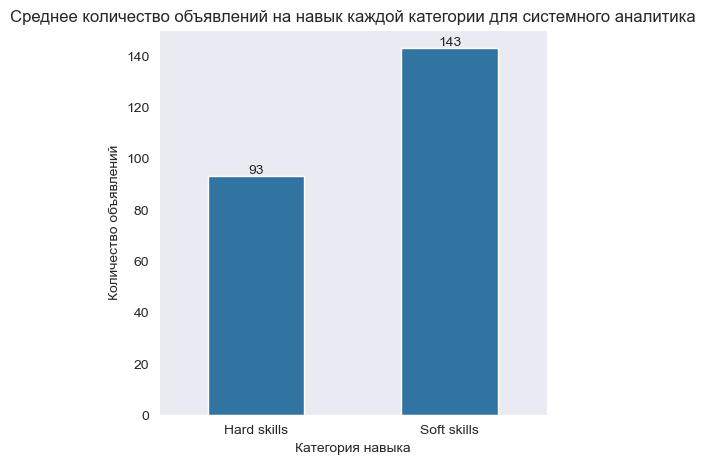

In [213]:
plt.figure(figsize = (5,5))
ax = sns.barplot (skills_sa_category, x = 'category', y = ('quantity', 'mean'), width = 0.5)
ax.bar_label(ax.containers[0])
plt.xlabel('Категория навыка')
plt.ylabel('Количество объявлений')
plt.tick_params(axis = 'x', rotation = 0)
plt.title('Среднее количество объявлений на навык каждой категории для системного аналитика')
plt.show()

В среднем, каждый hard skill системного аналитика встречается в датафрейме 89 раз, а каждый soft skill - 132 раза.

Посмотрим долю каждой категории навыков системных аналитиков в датафрейме.

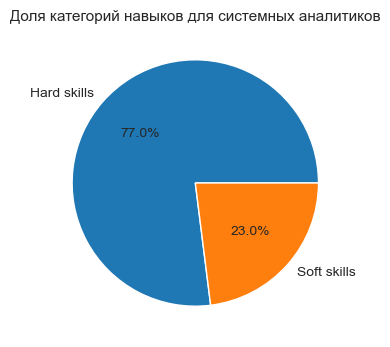

In [216]:
skills_sa_category.plot(kind = 'pie', x = 'category', y = ('quantity','sum'), autopct='%1.1f%%', \
labels = ['Hard skills','Soft skills'])
plt.ylabel('')
plt.legend().remove()
plt.title('Доля категорий навыков для системных аналитиков', fontsize = 11)
plt.show()

Примерно 3/4 навыков, требуемых работодателями в датафрейме, относятся к hard skills, 1/4 - к soft skills.

Полученные результаты говорят о том, что, несмотря на большое количество различных "жестких" навыков, "мягкие" навыки также имеют очень большое значение для системных аналитиков.

Теперь сделаем то же самое для аналитиков данных.

In [220]:
# срез с данными для аналитиков
df_exploded_da = df_exploded.query('name_binary == "аналитик данных"')

In [221]:
print(f'В срезе "df_exploded_da" {len(df_exploded_da)} записей')

В срезе "df_exploded_da" 8540 записей


In [222]:
df_exploded_da['key_skills'].value_counts()

key_skills
sql                                  765
python                               581
анализ данных                        408
                                     383
аналитическое мышление               364
                                    ... 
план-фактный анализ бюджета            1
поведение пользователей                1
русский язык                           1
internet marketing                     1
контрольно-аналитические проверки      1
Name: count, Length: 789, dtype: int64

In [223]:
# убираем
df_exploded_da = df_exploded_da.query('key_skills!= ""')

In [224]:
# получим спиок из 100 самых популярных навыков
skills_da = df_exploded_da.pivot_table(index = 'key_skills', values = 'id', aggfunc = 'count')\
.sort_values(by = 'id', ascending = False)
skills_da = skills_da.head(100).reset_index()
skills_da = skills_da.rename(columns = {'id':'quantity'})

In [225]:
skills_da['key_skills'].unique()

array(['sql', 'python', 'анализ данных', 'аналитическое мышление',
       'pandas', 'документация', 'power bi', 'ms excel',
       'работа с базами данных', 'работа с большим объемом информации',
       'коммуникация', 'аналитика', 'data analysis', 'базы данных',
       'ms sql', 'confluence', 'математическая статистика',
       'аналитические исследования', 'сбор и анализ информации',
       'tableau', 'postgresql', 'статистический анализ', 'ms powerpoint',
       'анализ бизнес показателей', 'a/b тесты', 'бизнес-анализ',
       'big data', 'прогнозирование', 'проактивность', 'etl',
       'clickhouse', 'английский язык', 'сводные таблицы', 'hadoop',
       'dwh', 'ms power bi', 'airflow', 'математический анализ',
       'подготовка презентаций', 'vba', 'юнит-экономика', 'numpy',
       'power query', 'spark', 'bi', 'визуализация данных',
       'работа в команде', 'powerbi', 'деловая коммуникация', 'excel',
       'git', 'подготовка отчетов', 'bpmn', 'анализ рынка', 'greenplum',
    

In [226]:
def categorize_skills_da(row):
    if 'мышление' in row or 'коммуникация' in row or 'проактивность' in row or 'язык' in row or 'работа в команде' in row \
or 'склад ума' in row or 'способности' in row or 'креативность' in row or 'переписка' in row or 'речь' in row \
or 'обучение' in row or 'документация' in row:
        return 'soft skills'
    else:
        return 'hard skills'

In [227]:
skills_da['category'] = skills_da['key_skills'].apply(categorize_skills_da)

In [228]:
skills_da.head()

,key_skills,quantity,category
0,sql,765,hard skills
1,python,581,hard skills
2,анализ данных,408,hard skills
3,аналитическое мышление,364,soft skills
4,pandas,327,hard skills


In [229]:
skills_da_category = skills_da.groupby('category').agg({'quantity':['mean','sum']}).reset_index()
skills_da_category[('quantity', 'mean')] = skills_da_category[('quantity', 'mean')].round()

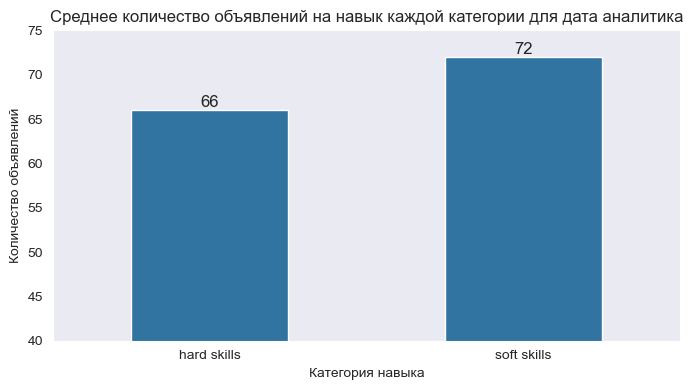

In [230]:
ax = sns.barplot(skills_da_category, x = 'category', y = ('quantity', 'mean'), width = 0.5)
ax.bar_label(ax.containers[0], fontsize = 12)
plt.xlabel('Категория навыка')
plt.ylabel('Количество объявлений')
plt.tick_params(axis = 'x', rotation = 0)
plt.ylim(40,75)
plt.title('Среднее количество объявлений на навык каждой категории для дата аналитика')
plt.tight_layout()
plt.show()

В среднем для каждого "жесткого" навыка дата аналитика приходится около 69 объявлений, для каждого "мягкого" - 57.

88% требуемых навыков в вакансиях для аналитиков данных - hard skills, 12% - soft skills.

Таким образом, несмотря на большое количество всевозможных "жестких" навыков, для работодателей важны также и "мягкие" навыки. Для системных аналитиков в большей степени, чем для аналитиков данных.

Определим для какой специальности и какого грейда требований больше. Для этого создадим в датафрейме столбец, в котором указано количество навыков для каждой вакансии из столбца "key_skills".

In [235]:
# создаем новый столбец, в котором с помощью лямбда-функции посчитано количество элементов (т.е. навыков) 
# из каждой ячейки столбца "key_skills"
df.loc[:,'skills_count'] = df.loc[:,'key_skills'].apply(lambda x: len(x))

In [236]:
#проверяем работу функции
pd.set_option("max_colwidth", None) # делаем так, чтобы все содержимое столбцов отображалось на экране
display(df[['key_skills','skills_count']].head())
pd.reset_option("max_colwidth")

,key_skills,skills_count
0,"[1с, аналитический склад ума, confluence, sql]",4
1,"[разработка технических заданий, бизнес-анализ, английский язык, rest, atlassian jira, сбор и анализ информации, документация, деловая коммуникация, uml, bpmn, api, системный анализ, atlassian confluence]",13
2,[документация],1
3,"[erp, atlassian jira, 1с: управление производственным предприятием, confluence, 1с: управление торговлей, erp-системы на базе 1с, коммуникация, 1с: предприятие: розница, atlassian confluence]",9
4,"[json, sql, xml, soap, html, js, java, css, c#]",9


Визуализируем среднее необходимое количество навыков для каждого грейда на столбчатых диаграммах.

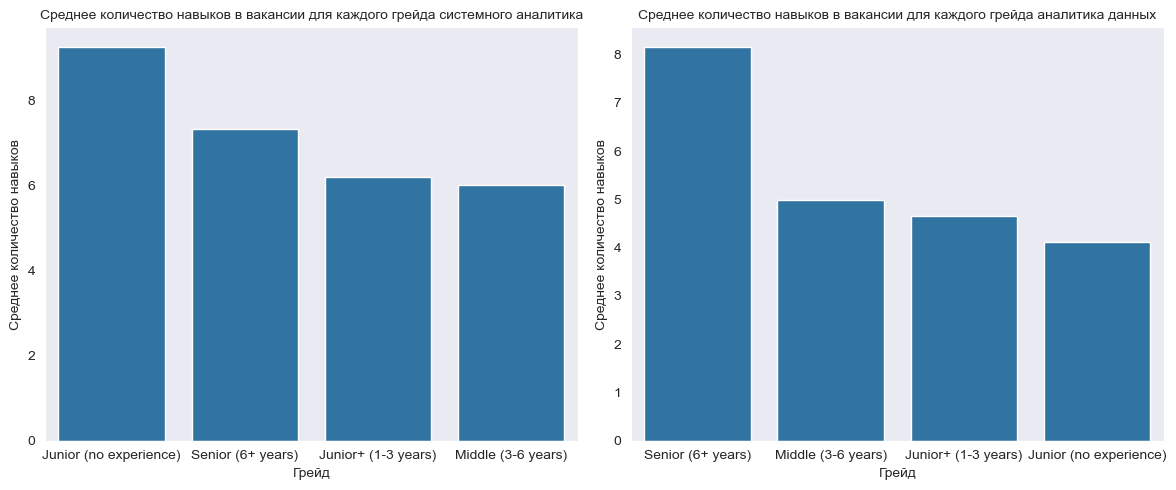

In [238]:
fig, axs = plt.subplots (1,2, figsize = (12,5))
for i,s in enumerate(df['name_binary'].unique()):
#создаем сводную таблицу, в которой группируем данные по грейдам и считаем для каждого среднее количество объявлений
    skills_by_grade = df[df['name_binary']==s].groupby('experience')['skills_count'].mean().reset_index().\
sort_values(by = 'skills_count', ascending = False)
#создаем столбчатую диаграмму
    sns.barplot(skills_by_grade, x = 'experience', y = 'skills_count', ax = axs[i])
    for ax in axs:
        ax.set(xlabel = 'Грейд', ylabel = 'Среднее количество навыков')
        ax.tick_params(axis = 'x', rotation = 0)    
    axs[0].set_title ('Среднее количество навыков в вакансии для каждого грейда системного аналитика', fontsize = 10)
    axs[1].set_title('Среднее количество навыков в вакансии для каждого грейда аналитика данных', fontsize = 10)
plt.tight_layout()
plt.show()

Наибольшее количество навыков в среднем требуется для системных аналитиков без опыта работы (около 9 навыков), наименьшее - для "миддлов" (около 6 навыков).

Для дата аналитиков чем больше у тебя опыт, тем больше навыков от тебя требуется. От "сеньоров" в среднем требуется 8 навыков, для аналитиков без опыта - примерно 4.

**Вывод по разделу**

Для аналитиков важны как "жесткие", так и "мягкие" навыки. Для системных аналитиков последние важны в большей степени.
Требования к количеству навыков у двух специальностей различаются: наибольшее количество навыков требуется от начинающих системных аналитиков, тогда как у аналитиков данных, наоборот, чем больше опыт, тем больше навыков требуется.

## Определение самых важных навыков

Определим самые важные навыки для аналитиков с разбивкой по грейдам.

Посмотрим самые важные soft skills системных аналитиков. Для этого создадим сводную таблицу, в которой будет указано количество объявлений для каждого "мягкого" навыка этой профессии.

In [245]:
# применяем категоризацию для каждого навыка
df_exploded_sa.loc[:,'skill_category'] = df_exploded_sa['key_skills'].apply(categorize_skills_sa)

In [246]:
df_exploded_sa['key_skills'].value_counts().head(20)

key_skills
документация                      1291
sql                                673
bpmn                               635
confluence                         580
системный анализ                   564
uml                                561
rest                               391
аналитическое мышление             293
коммуникация                       280
soap                               265
разработка технических заданий     245
постановка задач разработчикам     210
xml                                206
api                                182
бизнес-анализ                      168
atlassian jira                     151
json                               142
atlassian confluence               129
                                   129
json api                           116
Name: count, dtype: int64

Визуализируем данные для каждого грейда.

In [249]:
def skills_grade_plot(data, category, title):
    fig, axs = plt.subplots(2,2, figsize = (12,8))
    axs = axs.flatten()
    for i,g in enumerate(data['experience'].unique()):
        skills = data[(data['experience'] == g) & (data['key_skills']!= '') & (data['skill_category'] == category)]['key_skills'].value_counts().head()
        sns.barplot(skills, orient = 'y', ax = axs[i], width = 0.7)
        axs[i].set_title(f'Грейд {g}')
        axs[i].set_xlabel('Количество объявлений')
        axs[i].set_ylabel('')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

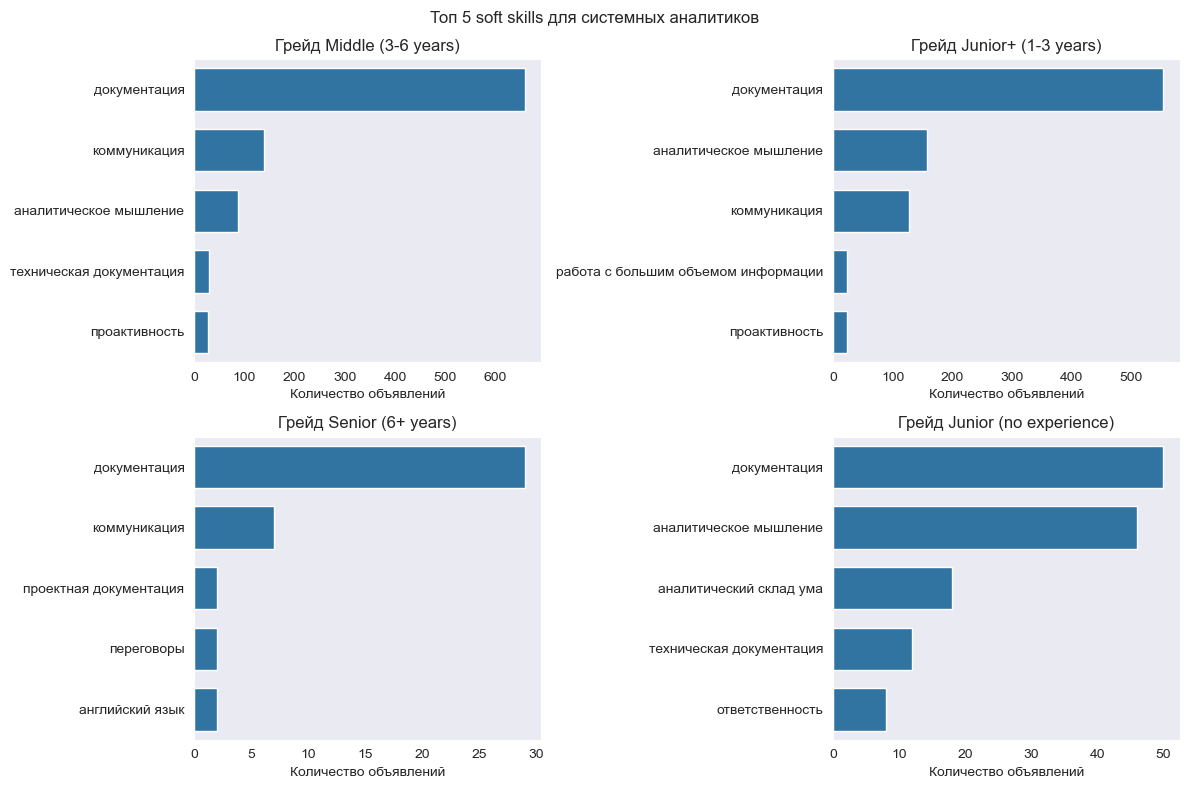

In [250]:
skills_grade_plot(df_exploded_sa,'Soft skills', 'Топ 5 soft skills для системных аналитиков')

5 самых требуемых soft skills для системных аналитиков представлены на графиках. Следует отметить, что для каждого грейда основным "мягким" навыком является работа с документацией, а также коммуникация и аналитическое мышление.

Рассмотрим самые важные hard skills системных аналитиков.

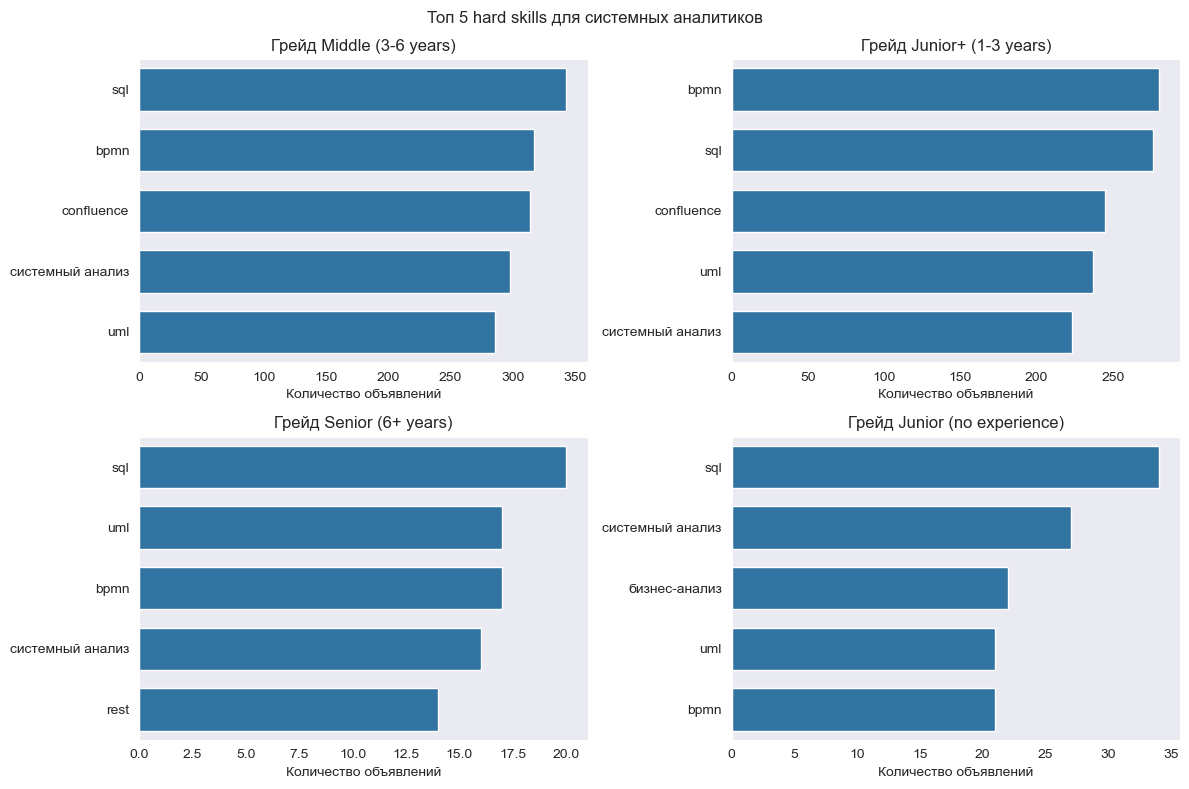

In [253]:
skills_grade_plot(df_exploded_sa,'Hard skills','Топ 5 hard skills для системных аналитиков')

Самые важные hard skills для системных аналитиков каждого грейда представлены на экране. В каждом грейде встречается SQL, BPMN и UML.

Сделаем то же самое для аналитиков данных.

Создадим графики с пятью самыми важными soft skills каждого грейда.

In [257]:
df_exploded_da['skill_category'] = df_exploded_da['key_skills'].apply(categorize_skills_da)

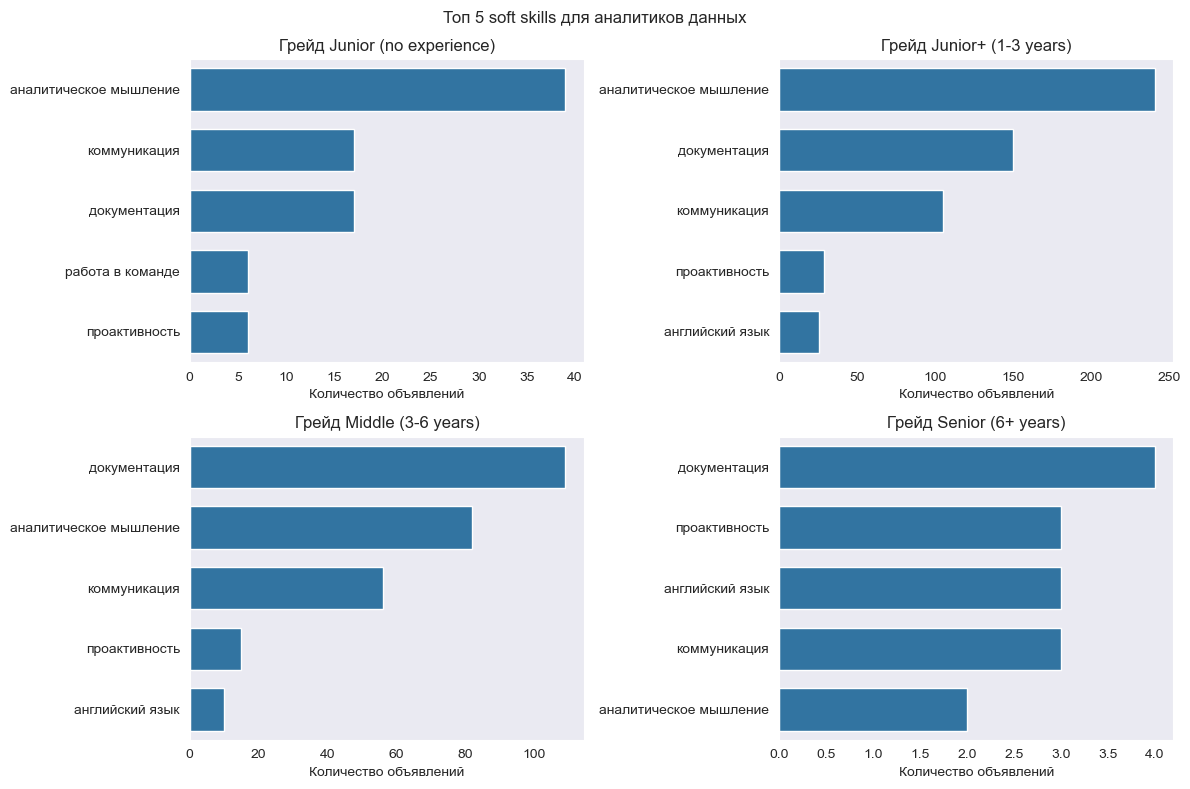

In [258]:
skills_grade_plot(df_exploded_da,'soft skills','Топ 5 soft skills для аналитиков данных')

Главные "мягкие" навыки для аналитиков данных каждого грейда представлены на экране. Особое значение имеют такие навыки как аналитический склад ума, работа с документацией, коммуникация, а также проактивность и знания английского языка.

Создадим графики с пятью самыми важными hard skills каждого грейда.

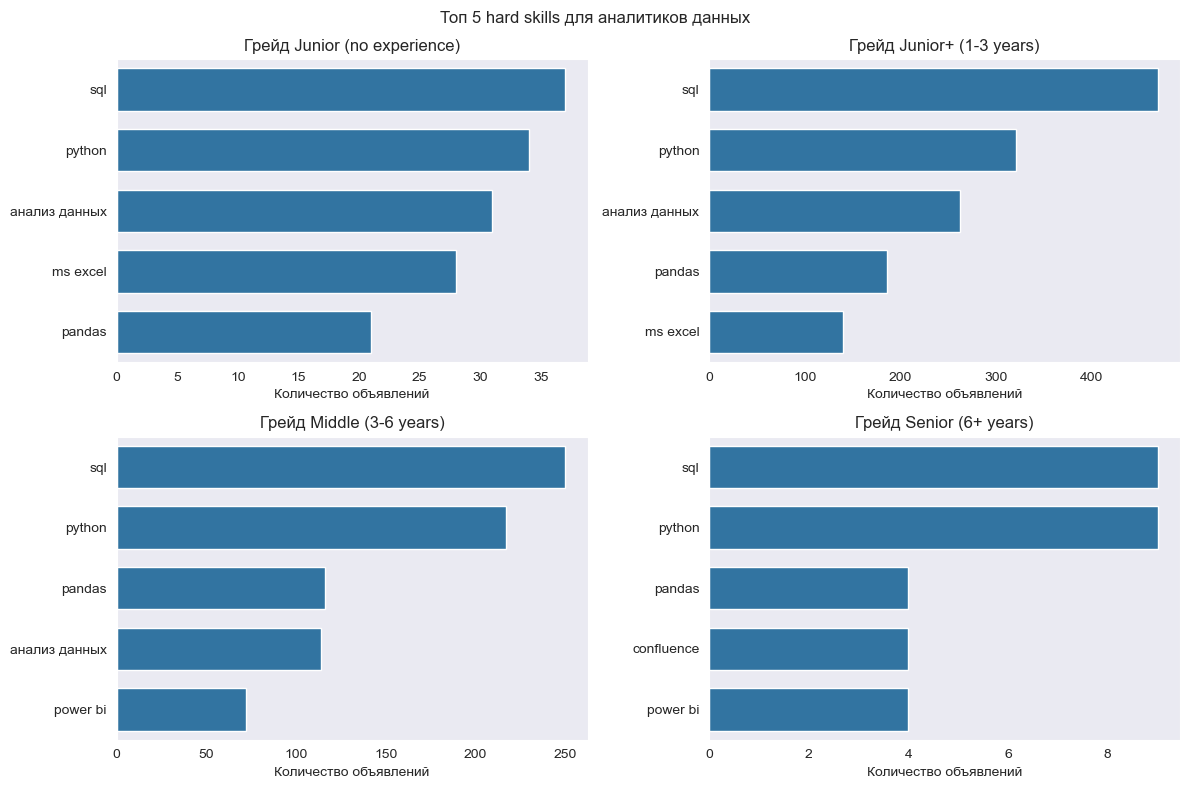

In [261]:
skills_grade_plot(df_exploded_da,'hard skills','Топ 5 hard skills для аналитиков данных')

5 самых важных "жестких" навыков для дата аналитиков представлены на экране. Особое значение имеют SQL, python и pandas. Для Junior и Junior+ специалистов важно также умение работать в Excel, а для более опытных - Power BI.

Наиболее важные навыки различаются для каждой специальности, но внутри них основные требуемые навыки сильно не меняются в зависимости от грейда.

## Выводы и рекоммендации

Таким образом, в ходе исследования сформирована картина о ключевых признаках каждого грейда специалистов по системной аналитике и анализу данных.  
Для формирования корректных предложений необходимо придерживаться следующих рекоммендаций:
+ **Системные аналитики**:
В целом у данной специальности более высокие заработные платы, чем у аналитиков данных. Набор навыков для каждого грейда не сильно друг от друга отличается. В качестве soft skills требуется в основном работа с документацией, коммуникативные навыки и аналитическое мышление. В качестве hard skills - SQL, BPMN, UML. 
    + **Junior:** зарплатная вилка в 50-70 тыс. рублей, самые высокие требования к количеству навыков из всех грейдов специальности. Основные конкуренты: Aston, Апогей, Твига;
    + **Junior +:** зарплатная вилка в 100-200 тыс. рублей. Основной конкурент Сбер, а также Aston, Совкомбанк и другие;
    + **Middle:** зарплатная вилка в 150-300 тыс. рублей, самые низкие требования к количеству навыков. Основные конкуренты: Т1 и Сбер.
    + **Senior:** данных мало для формирования рекоммендаций.
+ **Аналитики данных:**
Основными soft-скиллами для всех грейдов являются аналитическое мышление, коммуникация, документация, а также проактивность и знания английского языка. Основные hard-скиллы: SQL, Python и библиотека Pandas.
    + **Junior:** зарплатная вилка в 55-85 тыс. рублей. Среди мягких навыков наиболее важным является аналитическое мышление, среди hard-skills также важно умение работать в Excel. Самые низкие требования к количеству навыков среди всех грейдов. Основные конкуренты - Сбер и Магнит;
    + **Junior+:** зарплатная вилка в 90-150 тыс. рублей. Как и для предыдущего грейда самым важным soft skill является аналитическое мышление, а среди "хардов" важно уметь работать в Excel. Основной конкурент - Сбер;
    + **Middle:** зарплатная вилка в 150-300 тыс. рублей. Для данного грейда важен в первую очередь навык работы с документацией. К общим для дата-аналитиков hard skills добавляется умение работать в Power BI. Больше всего вакансий опубликовала компания Сбер.
    + **Senior:** данных недостаточно для формирования рекоммендаций.
 
Также стоит отметить, что для обоих специальностей на рынке характерна работа на полную занятость и полный рабочий день. Также распространен удаленный формат работы.